# Walmart - Confidence Interval and CLT

### Introduction

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Introduction
### 1. Defining Problem Statement and Analysing basic metrics

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
# import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [3]:
# Import the dataset
df = pd.read_csv("D:\\Jupyter\\wallmart EDA\\wallmart.csv")
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [4]:
# Checking shape of the data
df.shape

(550068, 10)

Insights - 

* There are 550068 transaction details and and 10 attributes for each transaction.

In [5]:
# 5 point statistical summary
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
# coulumn details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# 'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status' are categorical variables. 
# we need to change the datatype to category.

cols=['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
for name in cols:
    df[name]=df[name].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.3+ MB


In [9]:
### Inspecting duplicate and null values

In [10]:
# check if any duplicates
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [11]:
# check if any null value
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Insights - 
* We can see that there is no duplicates rows in the dataset
* We can see that there is no null values in the dataset

In [12]:
# Unique values (counts) for each Feature
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Insights

* The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products

In [13]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [14]:
print("Females are ", 1666/5891)
print("Males are ", 4225/5891)

Females are  0.2828042777117637
Males are  0.7171957222882362


Insight

* The percentage of Female customers is 28% compared to 72% are Male


In [15]:
df.groupby(['Age'])['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [16]:
df.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [17]:
df.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [18]:
df.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

#### 1.2  Non-Graphical Analysis: Value counts and unique attributes 

In [19]:
# No. of unique values for each feature
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [20]:
df['User_ID'].unique()

[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]

In [21]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [22]:
df['Product_ID'].unique()

['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642', 'P0099742', 'P0099842', 'P0099942']

In [23]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

In [24]:
df['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [25]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [26]:
(df['Gender'].value_counts()/len(df))*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [27]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [28]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [29]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [30]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [31]:
df['City_Category'].unique()

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

In [32]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [35]:
df['Marital_Status'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [36]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [37]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [38]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [39]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [40]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Insights:


* 75%(414259) of the sample data are male customers and 25%(135809) are female customers.
* Age group is categorised into 7 groups with max age group members are of 26-35 yrs and min age group is 0-17 yrs.
* 60% of purchases are made by people between the ages of 26 and 45
* Cities are categorised into three Types: A,B and C.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* The majority of our customers come from city category B.
* There are 20 different types of Occupation and Product_Category
* Product_Category - 5, 1, 8, & 11 have highest purchasing frequency.


In [41]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### 2. Missing Value & Outlier Detection

In [42]:
df.isnull().sum()/len(df)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

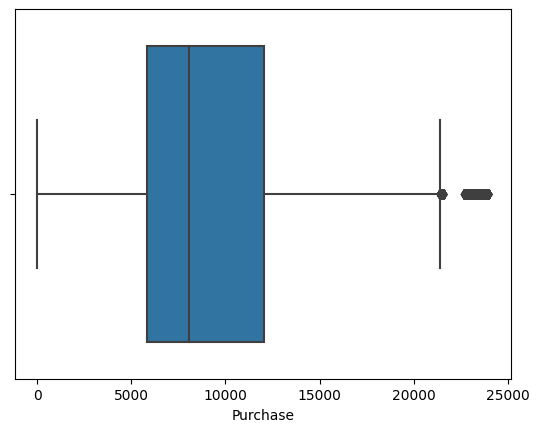

In [43]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

In [44]:
#Outlier Treatment
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [45]:
q3=df['Purchase'].quantile(0.75)
q1=df['Purchase'].quantile(0.25)
print("q1 :",q1)
print("q3 :",q3)

iqr=q3-q1
print("iqr :",iqr)

lcv=q1-1.5*iqr
ucv=q1+1.5*iqr
print('Lower critical value :',lcv)
print('Upper critical value :',ucv)

q1 : 5823.0
q3 : 12054.0
iqr : 6231.0
Lower critical value : -3523.5
Upper critical value : 15169.5


In [46]:
df_new = df[(df['Purchase'] > q1 - 1.5*iqr) & (df['Purchase'] < q3 + 1.5*iqr)]
print("Number of rows dropped\t: ",df.shape[0]-df_new.shape[0])   
print("\nOld dataset rows,columns",df.shape,"\nNew dataset rows,columns",df_new.shape)

Number of rows dropped	:  2677

Old dataset rows,columns (550068, 10) 
New dataset rows,columns (547391, 10)


Insights:
    
* There is no null values in the dataset.
* There are outliers in the purchase column. 

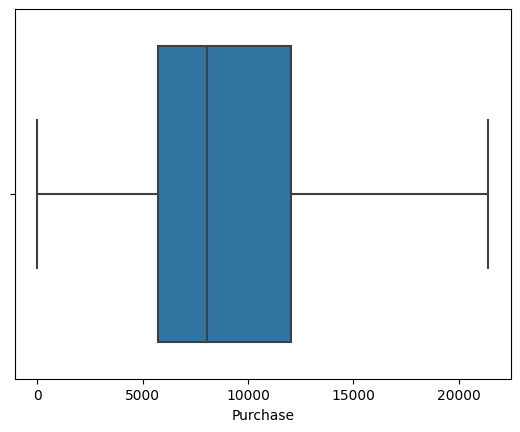

In [47]:
#After outlier treatment
sns.boxplot(data=df_new, x='Purchase', orient='h')
plt.show()

#### For continuous variable(s): Distplot, countplot, histogram for univariate analysis

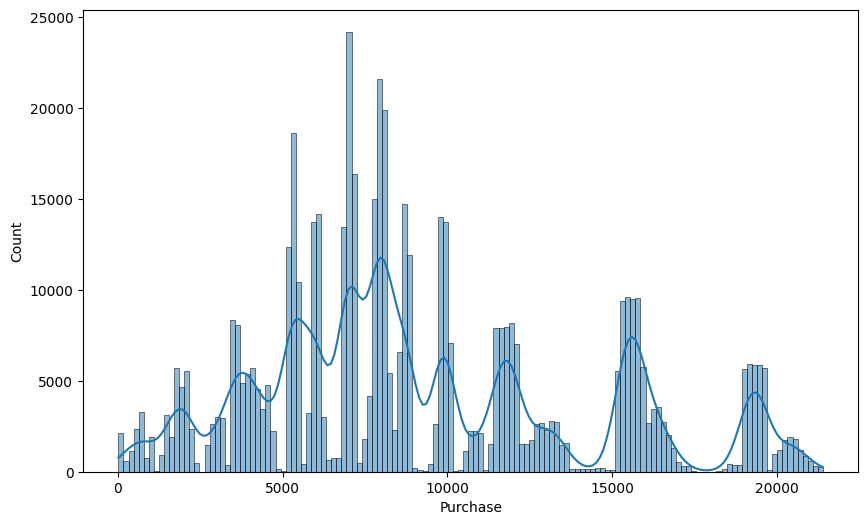

In [48]:
#Understanding the distribution of data and detecting outlies for continuous variables
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new,x='Purchase',kde=True)
plt.show()

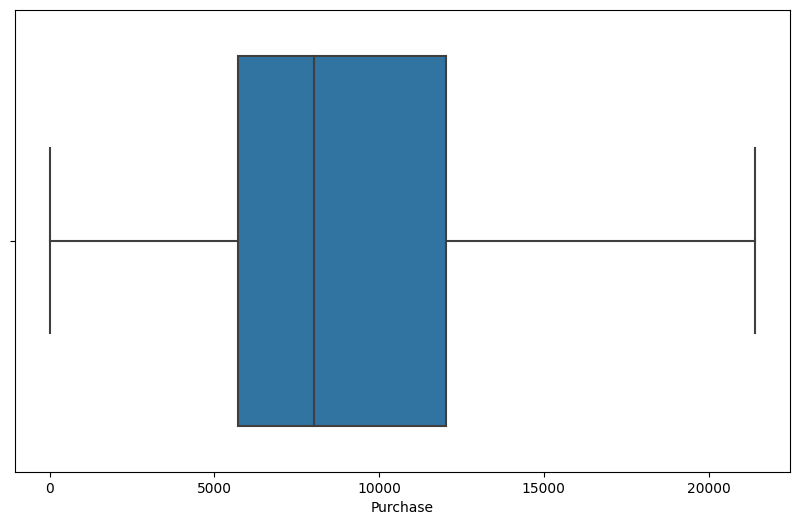

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Purchase', orient='h')
plt.show()

Insights:

* Majority of Customers purchase within the 5,000 - 20,000 range.
* Above graphs looks like "right-skewed distribution"

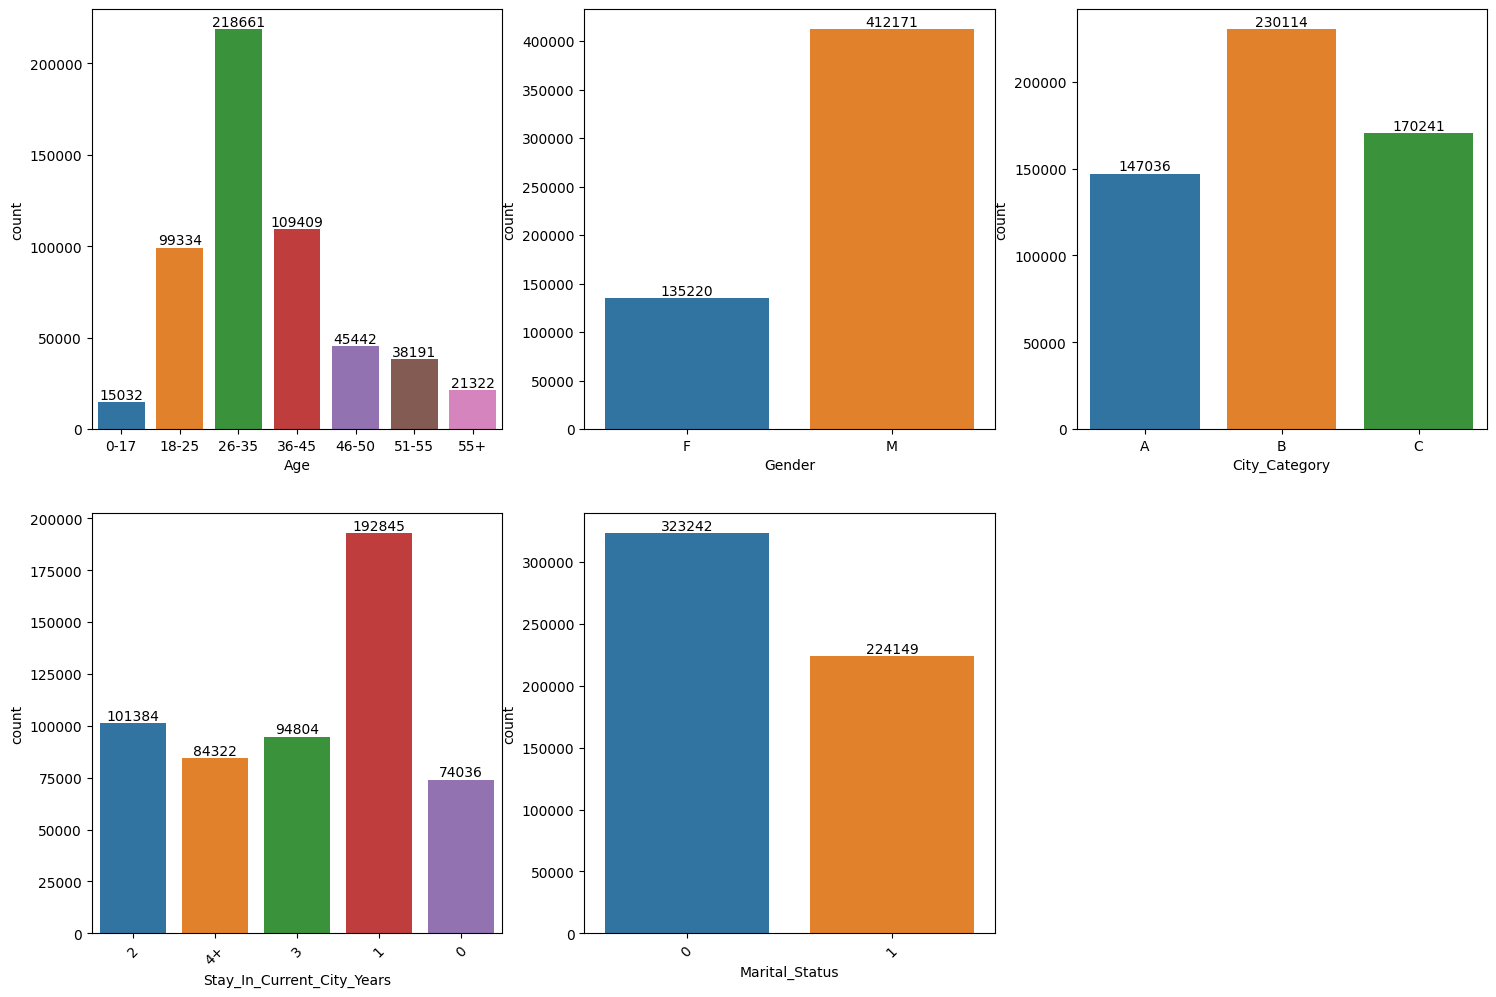

In [50]:
fig=plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
ax=sns.countplot(data=df_new,x='Age')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,2)
ax=sns.countplot(data=df_new,x='Gender')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,3)
ax=sns.countplot(data=df_new,x='City_Category')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,4)
ax=sns.countplot(data=df_new,x='Stay_In_Current_City_Years')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

plt.subplot(2,3,5)
ax=sns.countplot(data=df_new,x='Marital_Status')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

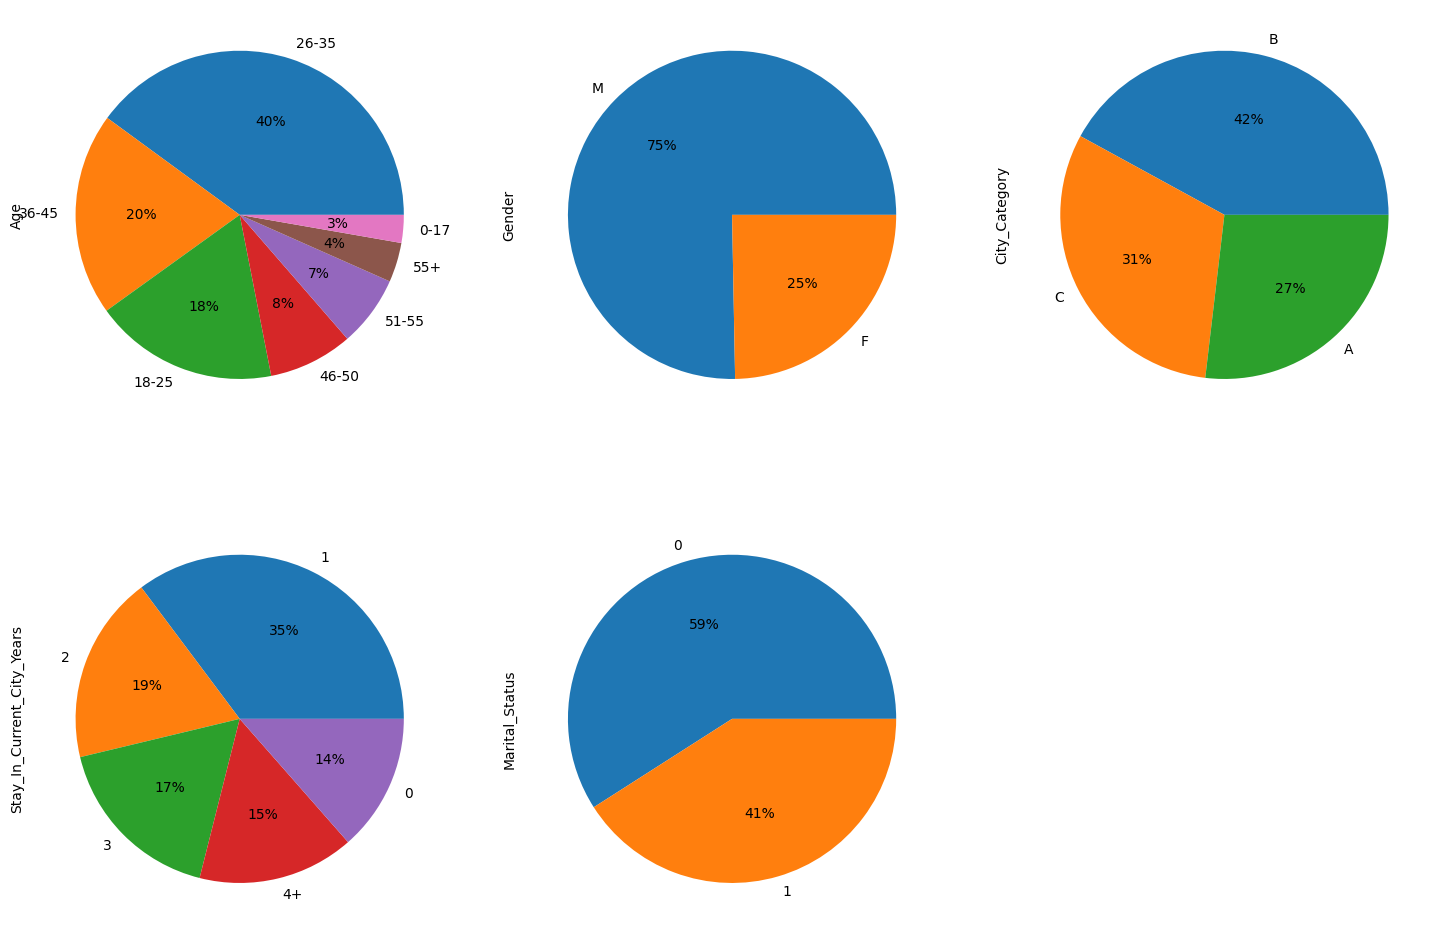

In [51]:
fig=plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
ax=df_new['Age'].value_counts().plot(kind='pie',y='UserID',autopct='%1.0f%%')
plt.xticks(rotation=45)

plt.subplot(2,3,2)
ax=df_new['Gender'].value_counts().plot(kind='pie',y='UserID',autopct='%1.0f%%')
plt.xticks(rotation=45)

plt.subplot(2,3,3)
ax=df_new['City_Category'].value_counts().plot(kind='pie',y='UserID',autopct='%1.0f%%')
plt.xticks(rotation=45)


plt.subplot(2,3,4)
ax=df_new['Stay_In_Current_City_Years'].value_counts().plot(kind='pie',y='UserID',autopct='%1.0f%%')
plt.xticks(rotation=45)


plt.subplot(2,3,5)
ax=df_new['Marital_Status'].value_counts().plot(kind='pie',y='UserID',autopct='%1.0f%%')
plt.xticks(rotation=45)
plt.show()

Insights:

* 75% of the sample data are male customers and 25% are female customers.
* 60% of purchases are made by people between the ages of 26 and 45
* City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* 35% Staying in the city from 1 year, 19% from 2 years, 17% from 3 years

#### For categorical variable(s): Boxplot 

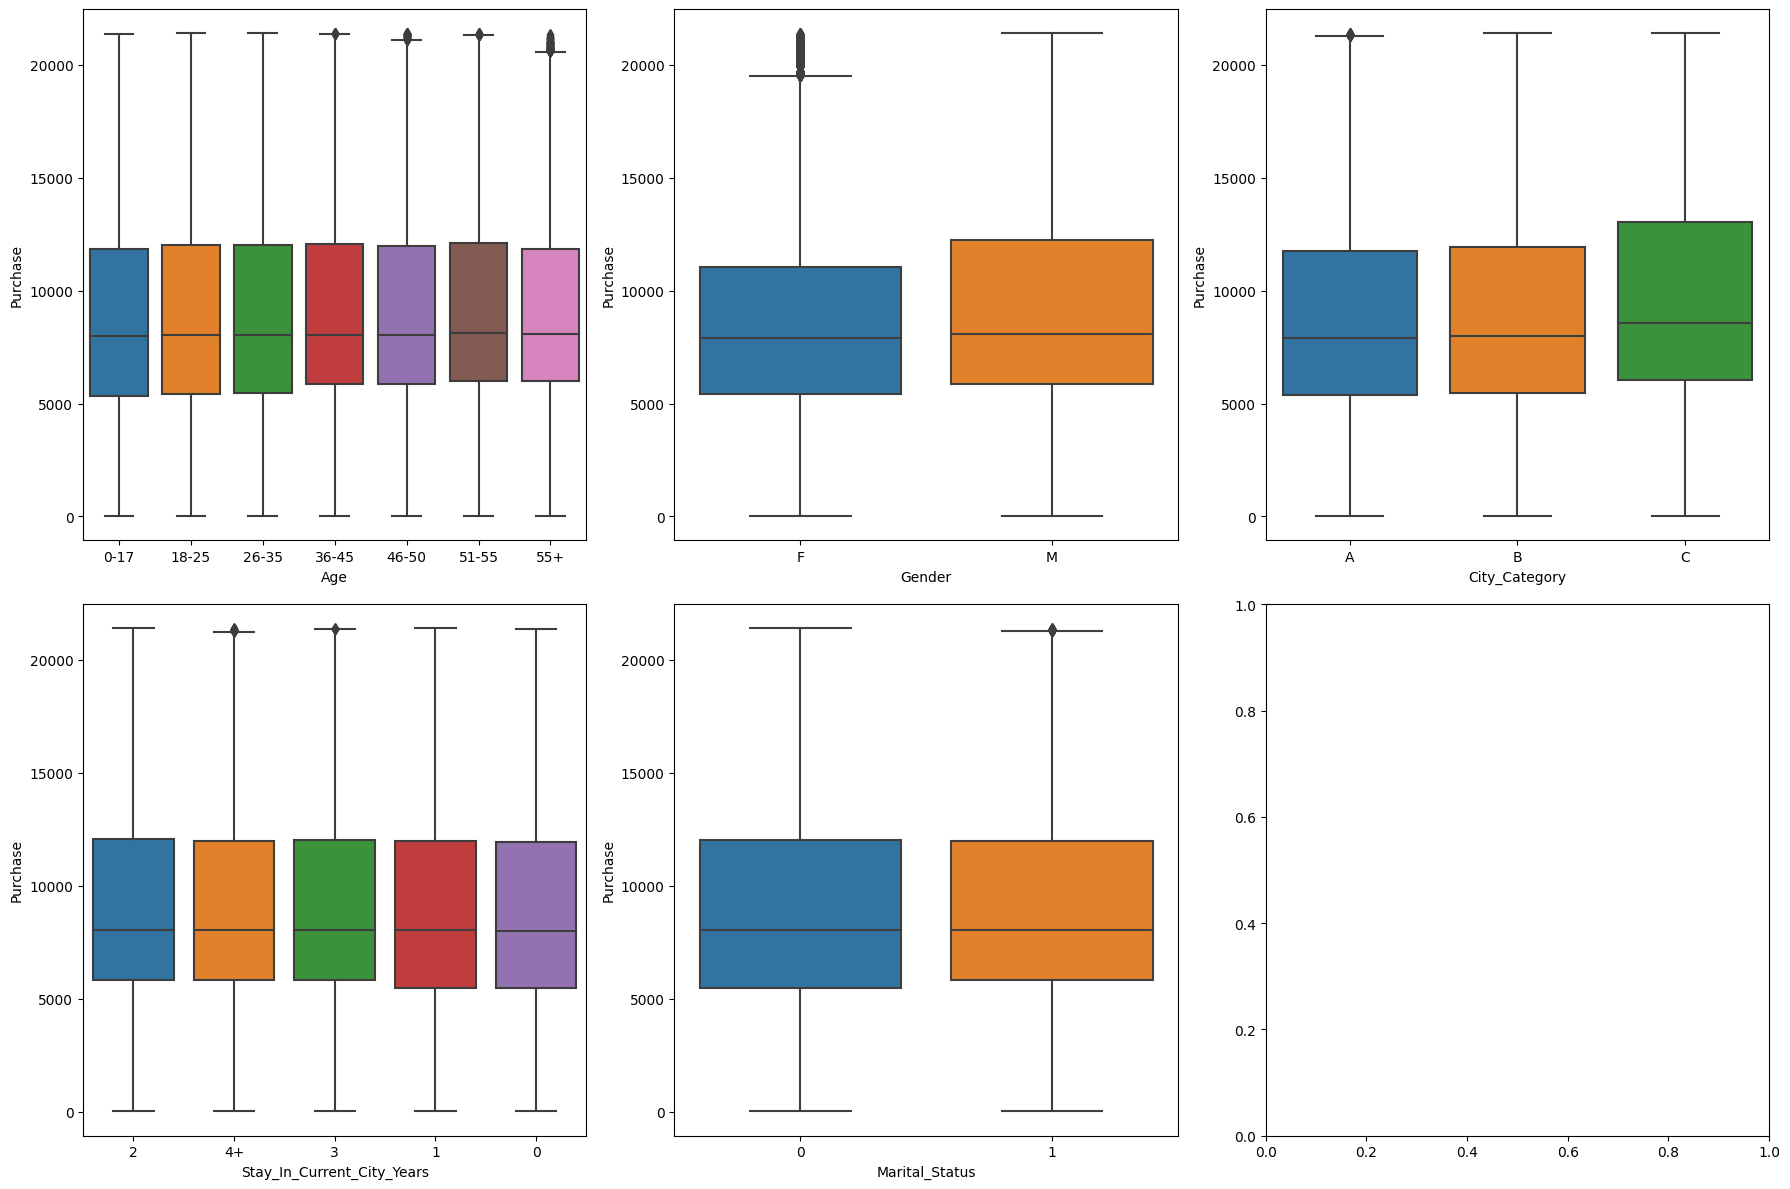

In [52]:

# Product Variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.boxplot(x="Age", y="Purchase", data=df_new, ax=axes[0, 0])
sns.boxplot(x="Gender", y="Purchase", data=df_new, ax=axes[0, 1])
sns.boxplot(x="City_Category", y="Purchase",data=df_new, ax=axes[0, 2])
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=df_new, ax=axes[1, 0])
sns.boxplot(x="Marital_Status", y="Purchase", data=df_new, ax=axes[1, 1])

plt.tight_layout()


plt.show()

####  For categorical variable(s): Boxplot -Multivariate

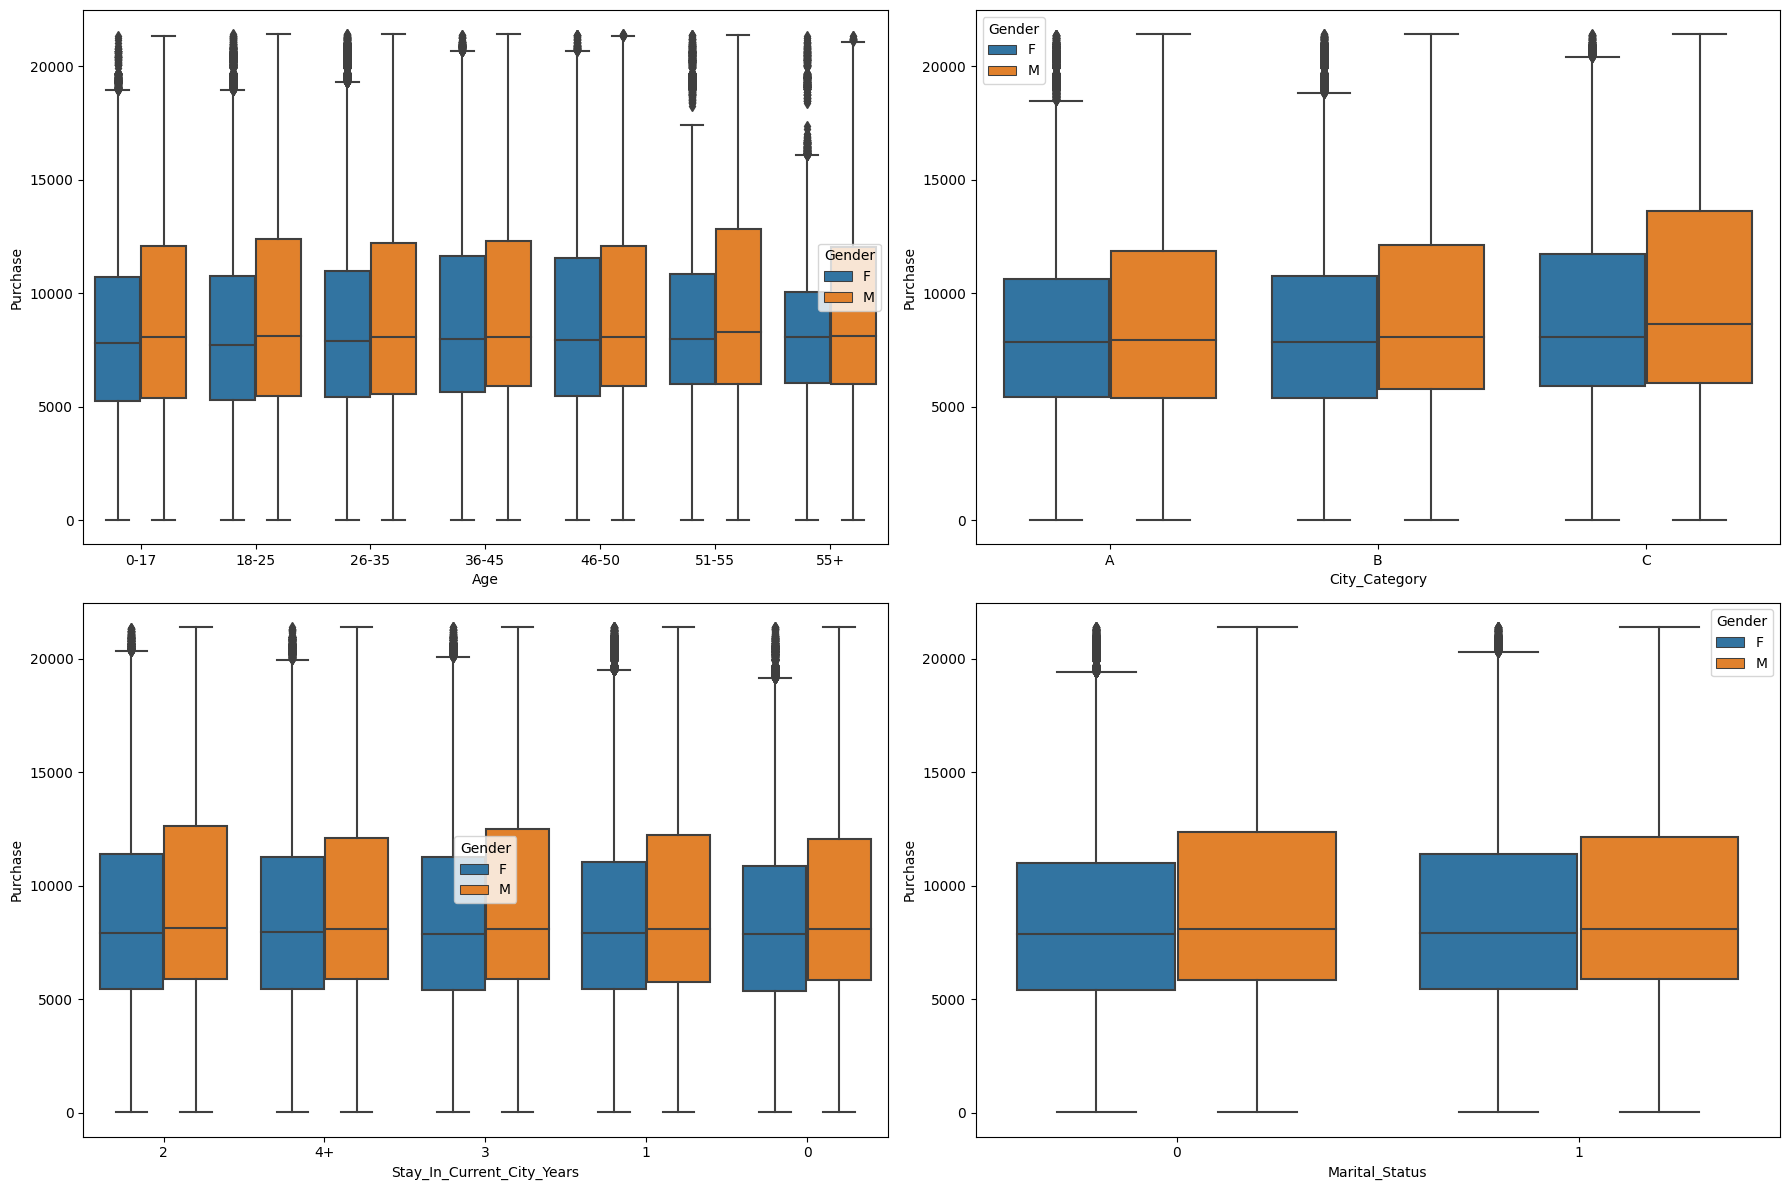

In [53]:
# Product Variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.boxplot(x="Age", y="Purchase", hue='Gender',data=df_new, ax=axes[0, 0])
sns.boxplot(x="City_Category", y="Purchase",hue='Gender',data=df_new, ax=axes[0, 1])
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase",hue='Gender', data=df_new, ax=axes[1, 0])
sns.boxplot(x="Marital_Status", y="Purchase",hue='Gender', data=df_new, ax=axes[1, 1])

plt.tight_layout()


plt.show()

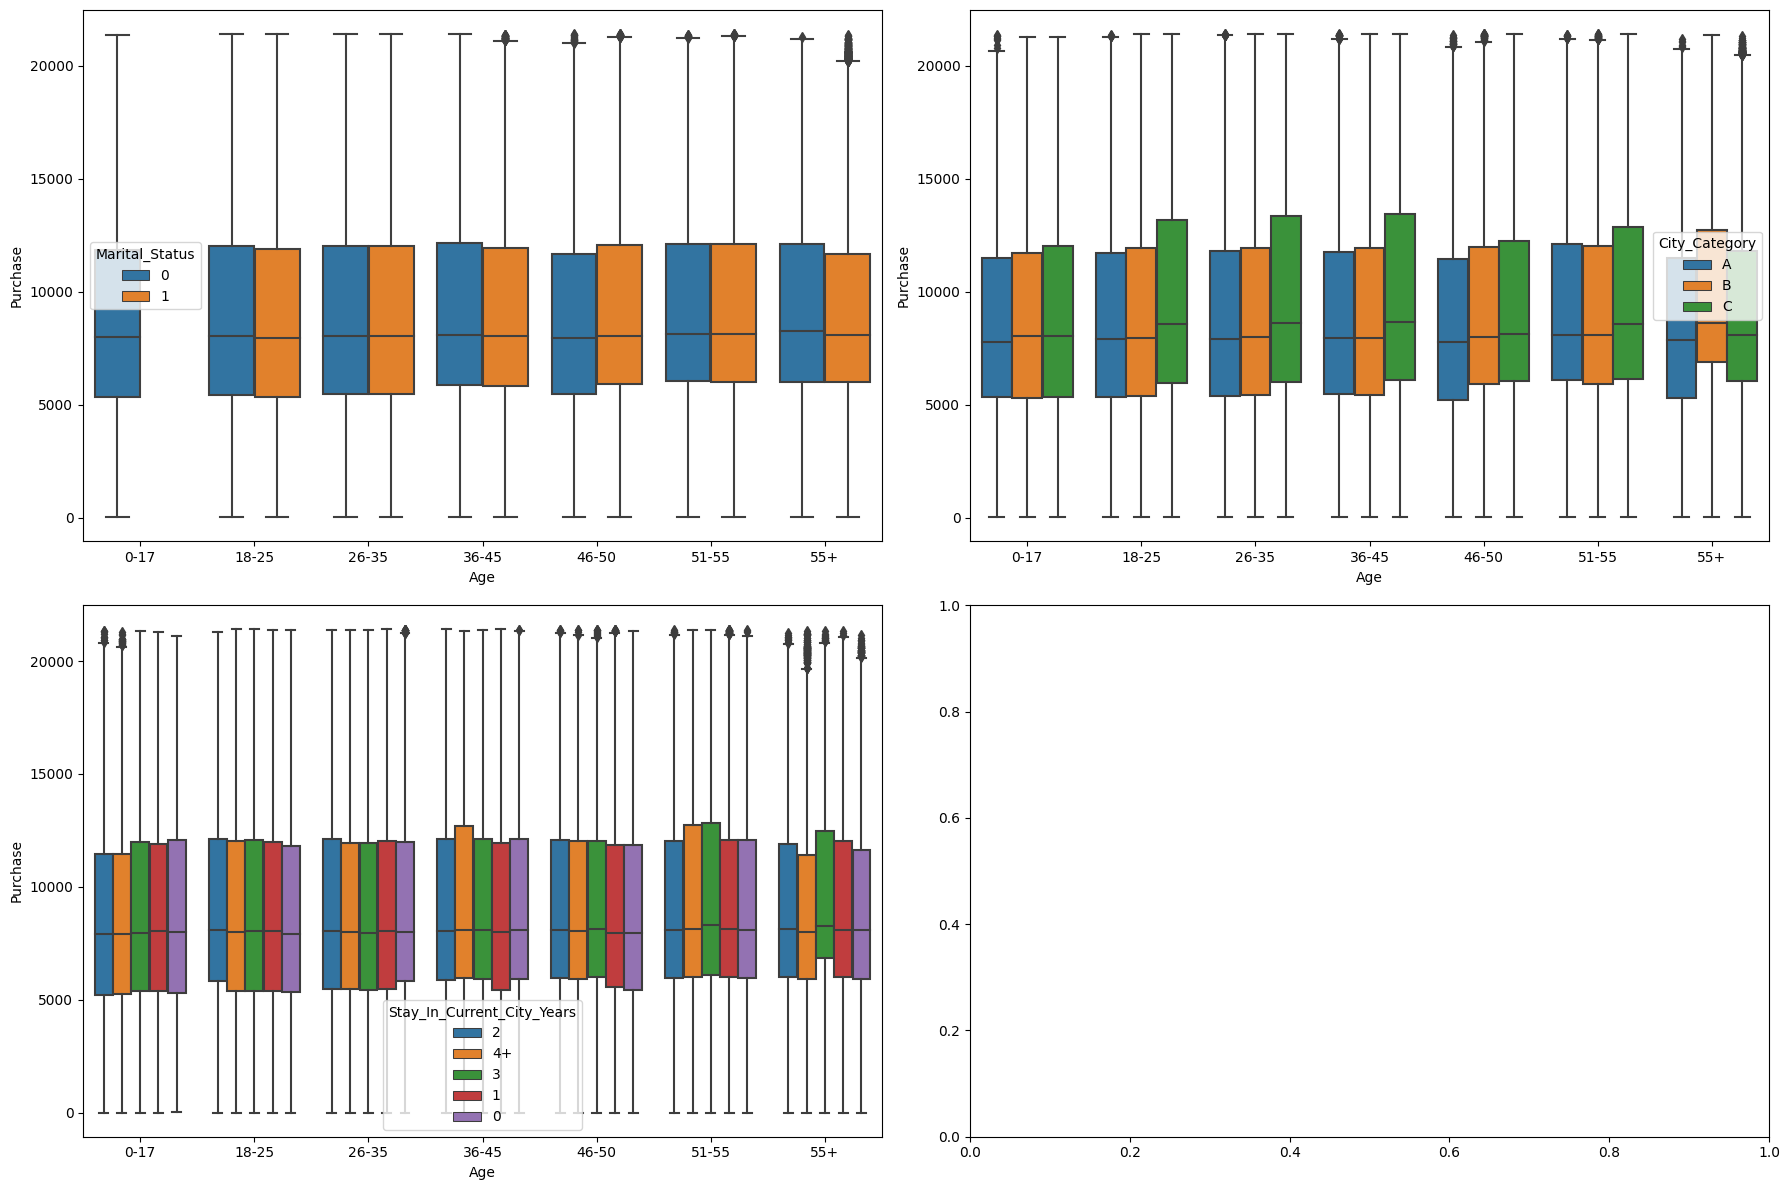

In [54]:
# Product Variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.boxplot(x="Age", y="Purchase", hue='Marital_Status',data=df_new, ax=axes[0, 0])
sns.boxplot(x="Age", y="Purchase", hue='City_Category',data=df_new, ax=axes[0, 1])
sns.boxplot(x="Age", y="Purchase",hue='Stay_In_Current_City_Years', data=df_new, ax=axes[1, 0])
plt.tight_layout()


plt.show()

Insights:
* The majority of our customers come from city category B but customers come from City category C spent more.
* Male customers tend to spend more than female customers.
* Purchase is same for all age groups
* Purchase is irrespective of marital status.

#### For correlation: Heatmaps, Pairplots


<AxesSubplot: >

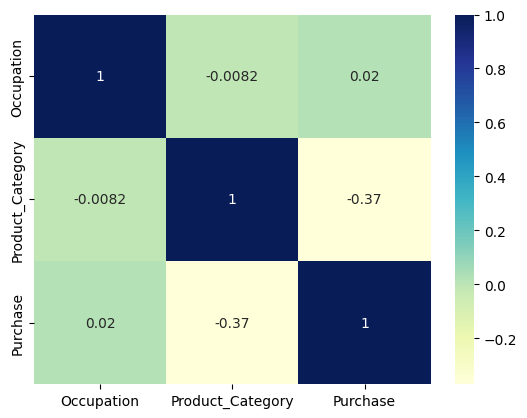

In [55]:
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")

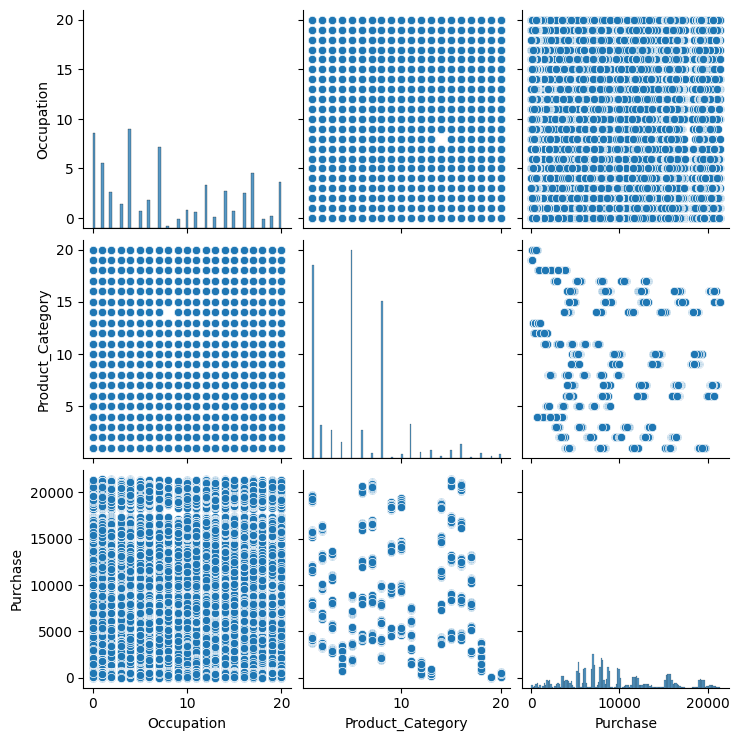

In [56]:
sns.pairplot(df_new)

Insights:
    
* Mostly features are categorical and not much correlation can be observed from above graphs.

### 3. Business Insights based on Non- Graphical and Visual Analysis

Insights - 

* There are 550068 transaction details and and 10 attributes for each transaction.
* We can see that there is no duplicates rows in the dataset
* We can see that there is no null values in the dataset
* The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products
* The percentage of Female customers is 28% compared to 72% are Male
* Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
* Age group is categorised into 7 groups with max age group members are of 26-35 yrs and min age group is 0-17 yrs.
* 60% of purchases are made by people between the ages of 26 and 45
* Cities are categorised into three Types: A,B and C.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* The majority of our customers come from city category B.
* There are 20 different types of Occupation and Product_Category
* Product_Category - 5, 1, 8, & 11 have highest purchasing frequency.
* 60% of purchases are made by people between the ages of 26 and 45
* City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* 35% Staying in the city from 1 year, 19% from 2 years, 17% from 3 years
* The majority of our customers come from city category B but customers come from City category C spent more.
* Male customers tend to spend more than female customers.
* Purchase is same for all age groups
* Purchase is irrespective of marital status.
* Mostly features are categorical and not much correlation can be observed from above graphs.

In [57]:

df_new.shape

(547391, 10)

In [58]:
df_new.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


#### Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

In [59]:
df_new_sample_male=df_new[df_new['Gender']=='M']['Purchase']
df_new_sample_female=df_new[df_new['Gender']=='F']['Purchase']


In [60]:
print("Male Customers : ",df_new_sample_male.shape[0])
print("Female Customers : ",df_new_sample_female.shape[0])

Male Customers :  412171
Female Customers :  135220


### CLT Analysis for mean purchase with confidence 90%
### Based on Gender

In [61]:
def bootstrapping_mf(sample_male,sample_female,smp_siz,itr_size,confidence_level):
    male_means = []
    female_means = []
    for i in range(itr_size):
        bootstrape_sample_male = np.random.choice(sample_male, size = smp_siz,replace=True)
        bootstrape_sample_male_mean=np.mean(bootstrape_sample_male)
        bootstrape_sample_female = np.random.choice(sample_female, size = smp_siz,replace=True)
        bootstrape_sample_female_mean=np.mean(bootstrape_sample_female)
        male_means.append(bootstrape_sample_male_mean)
        female_means.append(bootstrape_sample_female_mean)
        
        
    # Calculate the mean of sampling distribution,CI of a sample mean
    sample_mean_male=round((np.mean(male_means)),2)
    sample_mean_female=round((np.mean(female_means)),2)
    
    lower_limit_male=round(np.percentile(male_means,(100-(100*ci))),2)
    upper_limit_male=round(np.percentile(male_means,(100*ci)),2)

    lower_limit_female=round(np.percentile(female_means,(100-(100*ci))),2)
    upper_limit_female=round(np.percentile(female_means,(100*ci)),2)

                           
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=male_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=female_means,color='#e5ae38',fill=True,linewidth=2)
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {sample_mean_male},Female Avg:{sample_mean_female}",fontsize=14)
    plt.xlabel('Purchase')
    
    plt.show()
    
    return male_means,female_means ,lower_limit_male,upper_limit_male,lower_limit_female,upper_limit_female

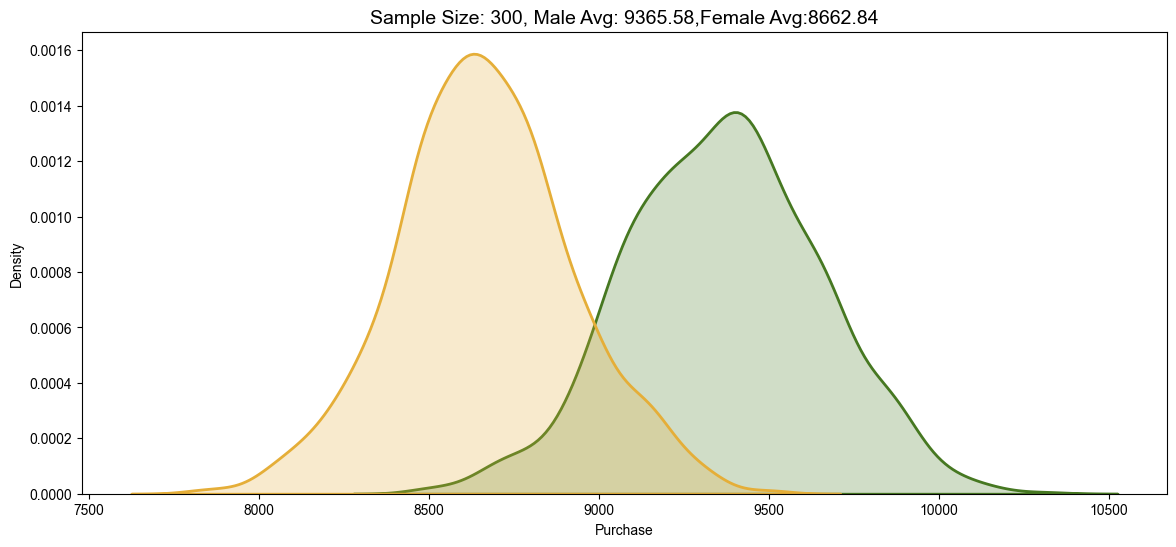

Sample Size : 300
Confident % : 0.9
CI Male:  [ 9013.17 9723.82 ]
CI Female:  [ 8344.26 8997.07 ]


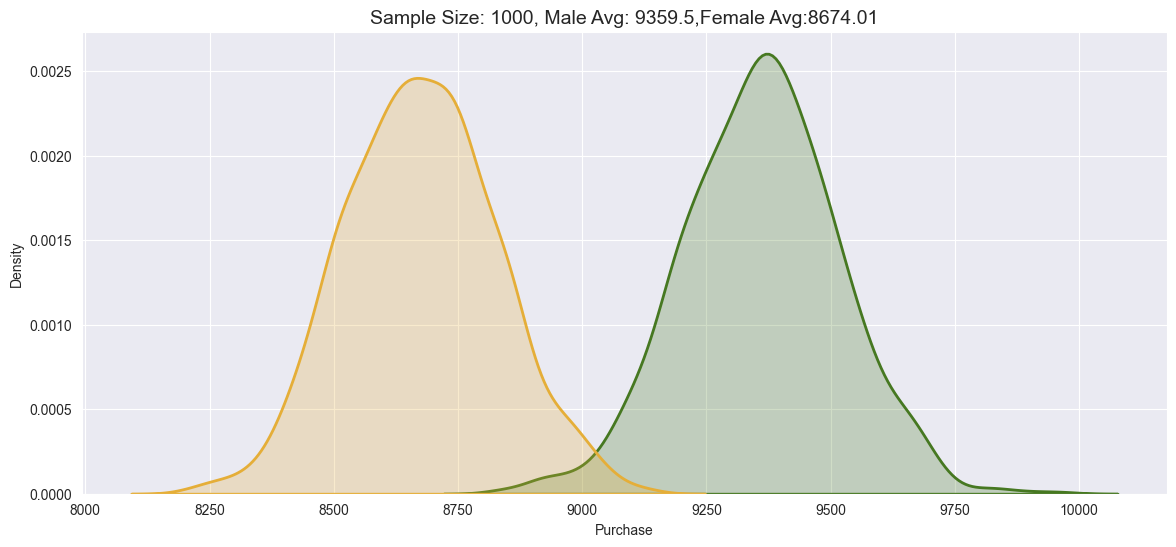

Sample Size : 1000
Confident % : 0.9
CI Male:  [ 9167.69 9557.87 ]
CI Female:  [ 8481.16 8869.18 ]


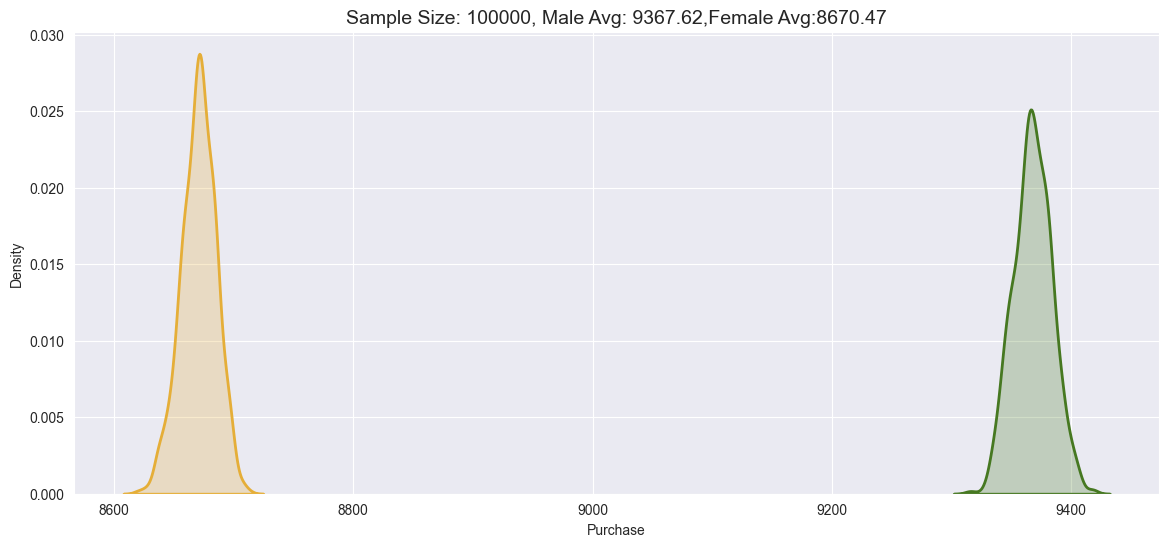

Sample Size : 100000
Confident % : 0.9
CI Male:  [ 9346.55 9387.64 ]
CI Female:  [ 8651.71 8688.31 ]


In [62]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.90

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_mf(df_new_sample_male,df_new_sample_female,smp_siz,itr_size,ci)
    #Alpha= 0.5

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Male: ", "[",ll_m,ul_m,"]")
    print( "CI Female: ", "[",ll_f,ul_f,"]")
    
    

Insights:
    
* As the sample size increases , both male anf female start to be distict.
* For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8651.42, 8689.92]
* For Male range for mean purchase with confidence interval 90% is [9345.75, 9389.92]

### CLT Analysis for mean purchase with confidence 95%
### Based on Gender

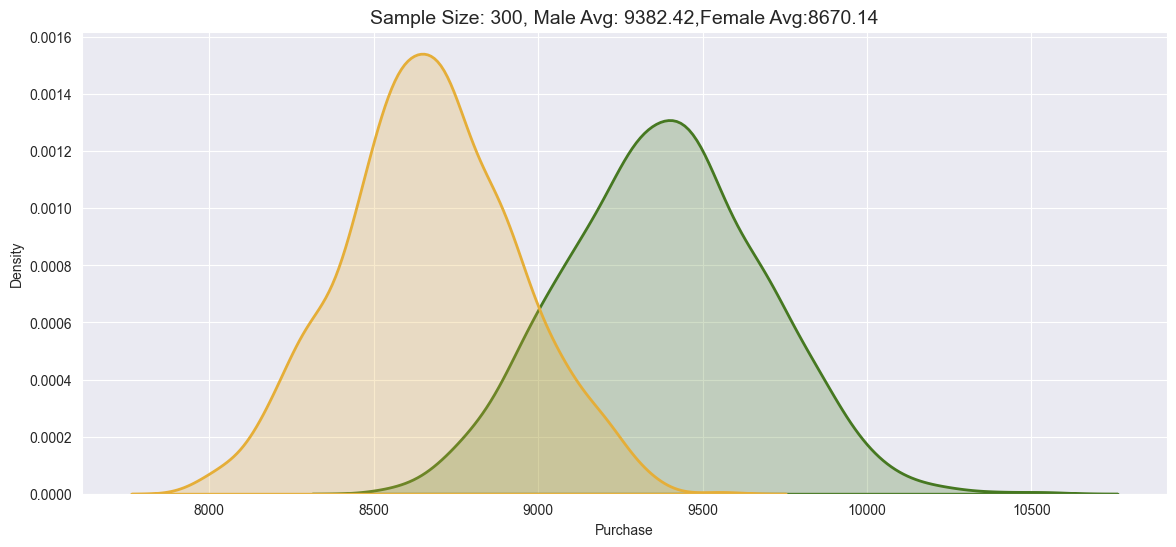

Sample Size : 300
Confident % : 0.95
CI Male:  [ 8901.18 9871.93 ]
CI Female:  [ 8236.77 9116.64 ]


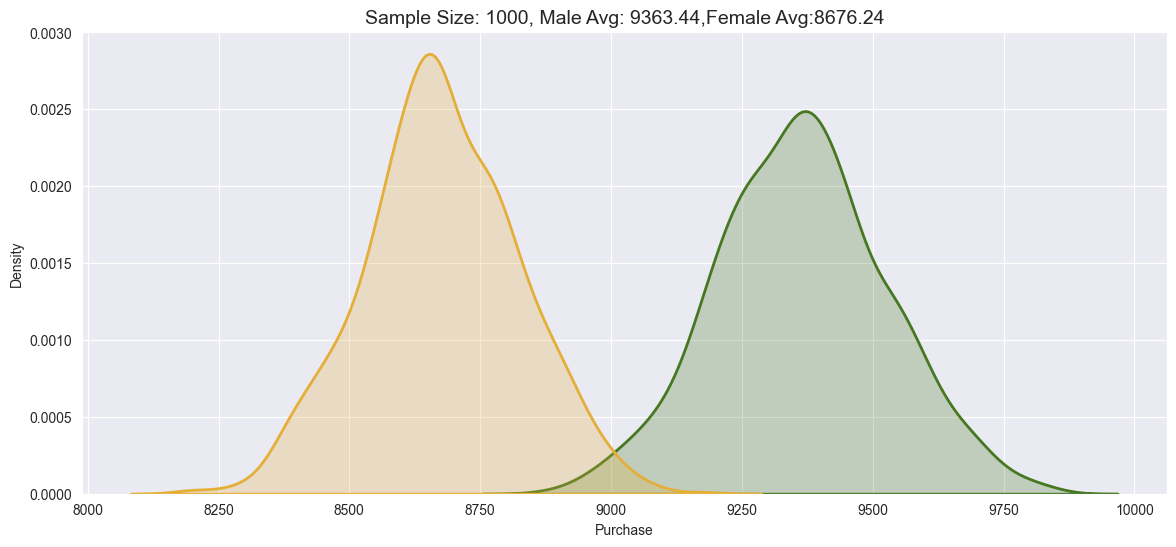

Sample Size : 1000
Confident % : 0.95
CI Male:  [ 9093.07 9635.67 ]
CI Female:  [ 8429.38 8922.46 ]


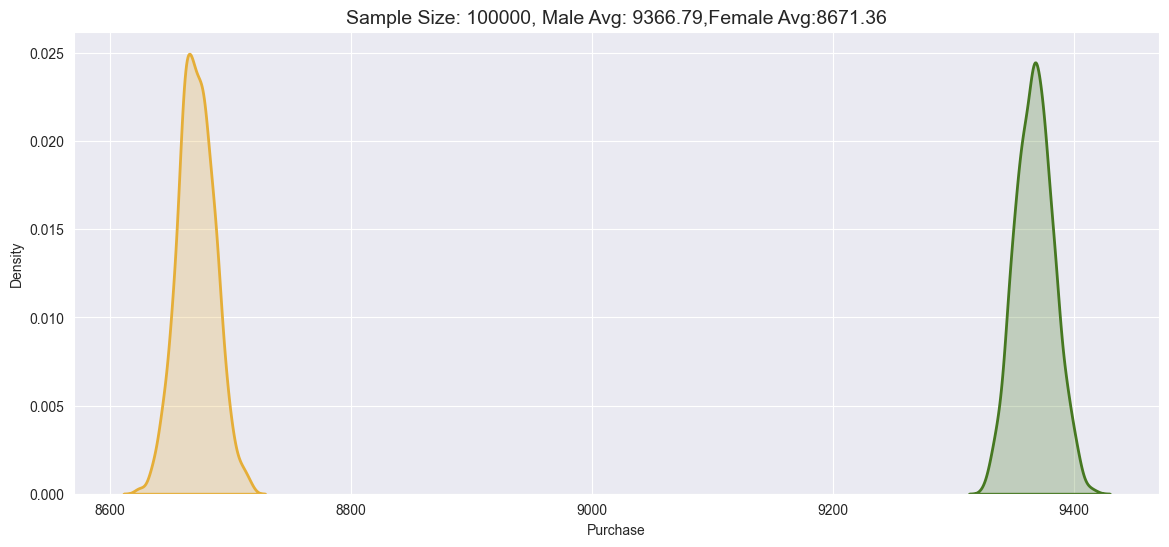

Sample Size : 100000
Confident % : 0.95
CI Male:  [ 9341.45 9393.77 ]
CI Female:  [ 8646.12 8696.42 ]


In [63]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.95

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_mf(df_new_sample_male,df_new_sample_female,smp_siz,itr_size,ci)
    #Alpha= 0.5

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Male: ", "[",ll_m,ul_m,"]")
    print( "CI Female: ", "[",ll_f,ul_f,"]")
    
    

Insight

* Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%
* For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8647.08, 8694.52.58]

* For Male range for mean purchase with confidence interval 95% is [9340.71, 9392.52]

* Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### CLT Analysis for mean purchase with confidence 99%
### Based on Gender

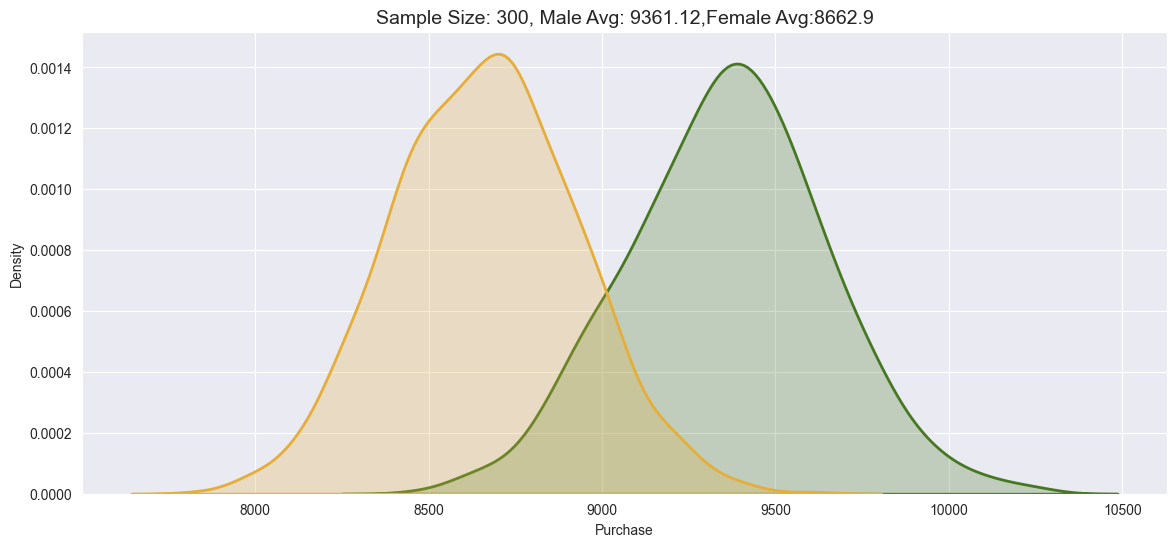

Sample Size : 300
Confident % : 0.99
CI Male:  [ 8667.23 10057.72 ]
CI Female:  [ 8076.23 9268.62 ]


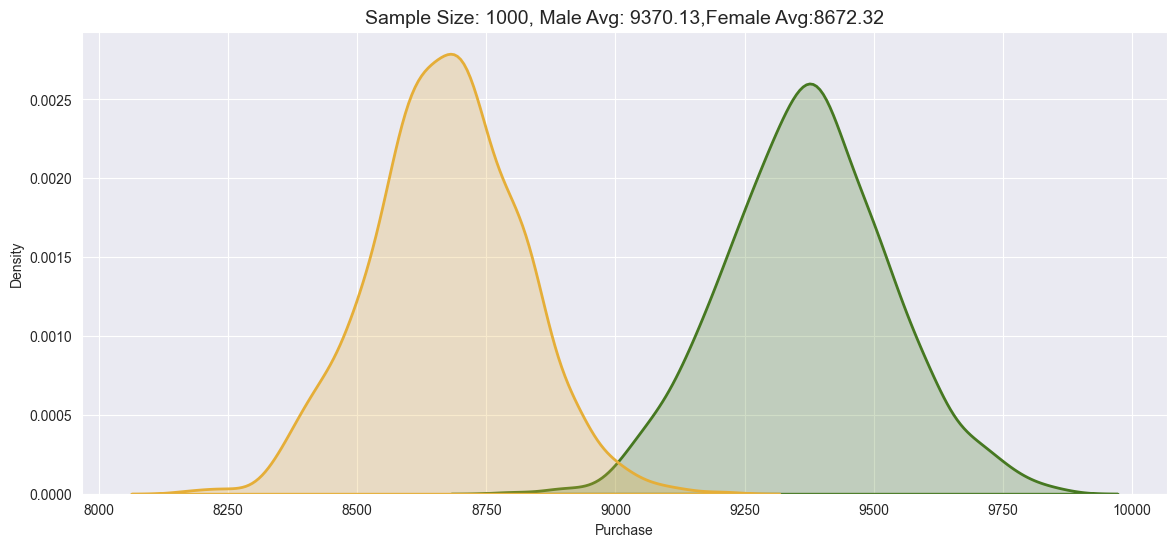

Sample Size : 1000
Confident % : 0.99
CI Male:  [ 9021.47 9752.26 ]
CI Female:  [ 8349.57 9013.09 ]


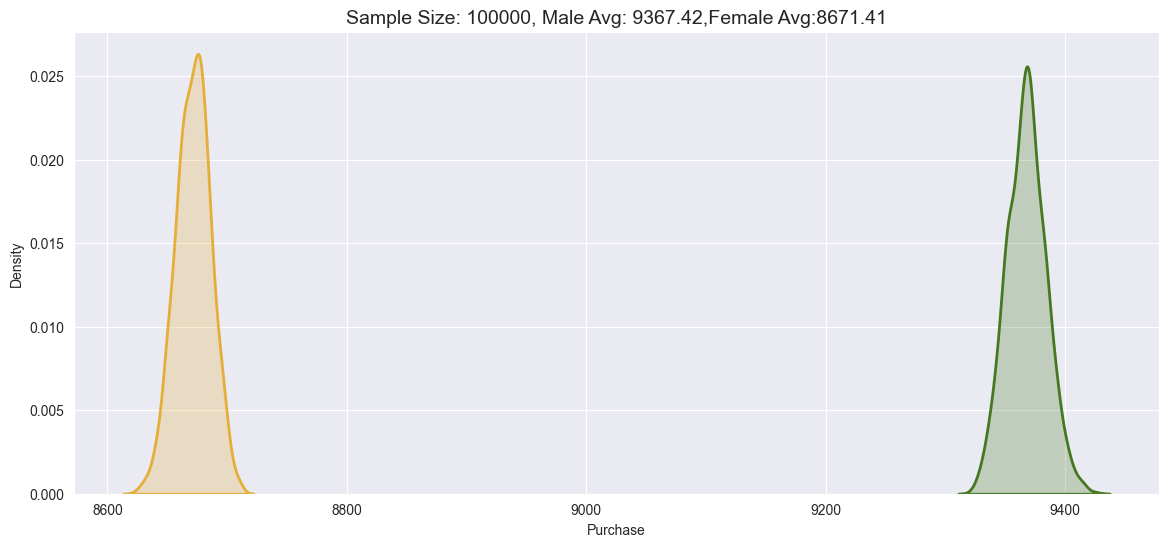

Sample Size : 100000
Confident % : 0.99
CI Male:  [ 9332.52 9407.63 ]
CI Female:  [ 8635.85 8704.08 ]


In [64]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.99

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_mf(df_new_sample_male,df_new_sample_female,smp_siz,itr_size,ci)
    #Alpha= 0.5

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Male: ", "[",ll_m,ul_m,"]")
    print( "CI Female: ", "[",ll_f,ul_f,"]")
    
    

Inference

* Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
* For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8637.09, 8706.4]

* For Male range for mean purchase with confidence interval 99% is [9332.29, 9402.76]
* Increase in  confidence percentage increase the difference between the upper and lower limits. For male Confidence percent as [90,95,99] have difference between the upper & lower limits as [43.28,51.61,70.47]. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [38.5,47.44,69.31]

Insights/Recommendations:
    
* We can infer that on average females spent less than males.
* More focus on female customers can be done.
* Some exclusive offers for females customers can incerease their purchasing frequency
* Company should focus on retaining the male customers and getting more female customers.

### CLT Analysis for mean purchase with confidence 90% - Based on Marital Status

In [65]:
df_new_sample_unmarried=df_new[df_new['Marital_Status']==0]['Purchase']
df_new_sample_married=df_new[df_new['Marital_Status']==1]['Purchase']

In [66]:
print("Unammried Customers : ",df_new_sample_unmarried.shape[0])
print("Married Customers : ",df_new_sample_married.shape[0])

Unammried Customers :  323242
Married Customers :  224149


In [67]:
def bootstrapping_um(sample_unmarried,sample_married,smp_siz,itr_size,confidence_level):
    unmarried_means = []
    married_means = []
    for i in range(itr_size):
        bootstrape_sample_unmarried = np.random.choice(sample_unmarried, size = smp_siz,replace=True)
        bootstrape_sample_unmarried_mean=np.mean(bootstrape_sample_unmarried)
        bootstrape_sample_married = np.random.choice(sample_married, size = smp_siz,replace=True)
        bootstrape_sample_married_mean=np.mean(bootstrape_sample_married)
        unmarried_means.append(bootstrape_sample_unmarried_mean)
        married_means.append(bootstrape_sample_married_mean)
        
        
    # Calculate the mean of sampling distribution,CI of a sample mean
    sample_mean_unmarried=round((np.mean(unmarried_means)),2)
    sample_mean_married=round((np.mean(married_means)),2)
    
    lower_limit_unmarried=round(np.percentile(unmarried_means,(100-(100*ci))),2)
    upper_limit_unmarried=round(np.percentile(unmarried_means,(100*ci)),2)

    lower_limit_married=round(np.percentile(married_means,(100-(100*ci))),2)
    upper_limit_married=round(np.percentile(married_means,(100*ci)),2)

                           
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=unmarried_means,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=married_means,color='#e5ae38',fill=True,linewidth=2)
    
    plt.title(f"Sample Size: {smp_siz}, unmarried Avg: {sample_mean_unmarried},married Avg:{sample_mean_married}",fontsize=14)
    plt.xlabel('Purchase')
    
    plt.show()
    
    return unmarried_means,married_means ,lower_limit_unmarried,upper_limit_unmarried,lower_limit_married,upper_limit_married

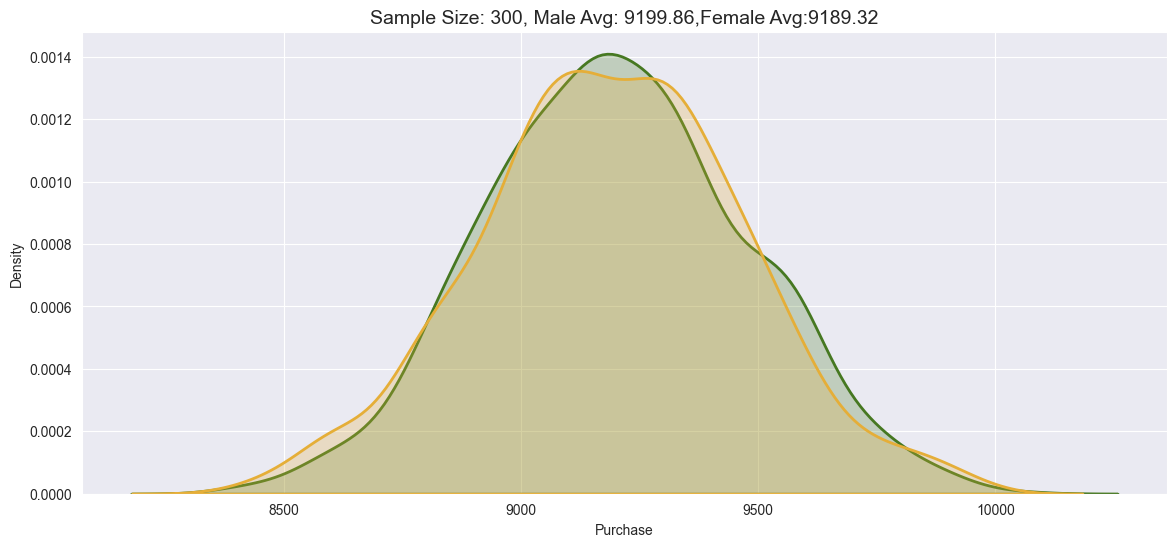

Sample Size : 300
Confident % : 0.9
CI Unmarried:  [ 8848.18 9573.48 ]
CI Married:  [ 8827.54 9533.91 ]


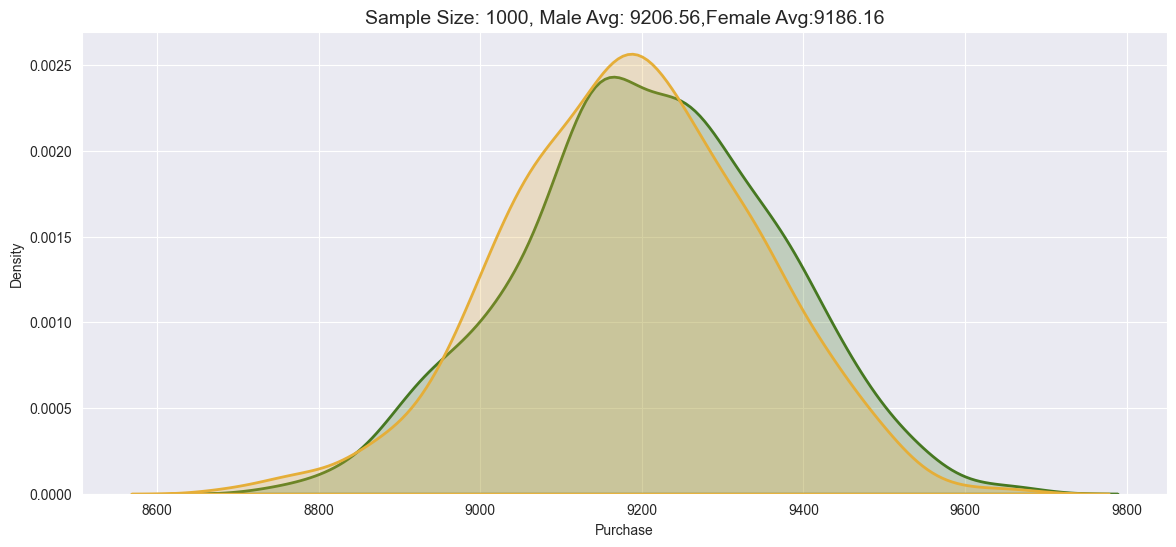

Sample Size : 1000
Confident % : 0.9
CI Unmarried:  [ 8999.78 9412.29 ]
CI Married:  [ 8996.41 9386.56 ]


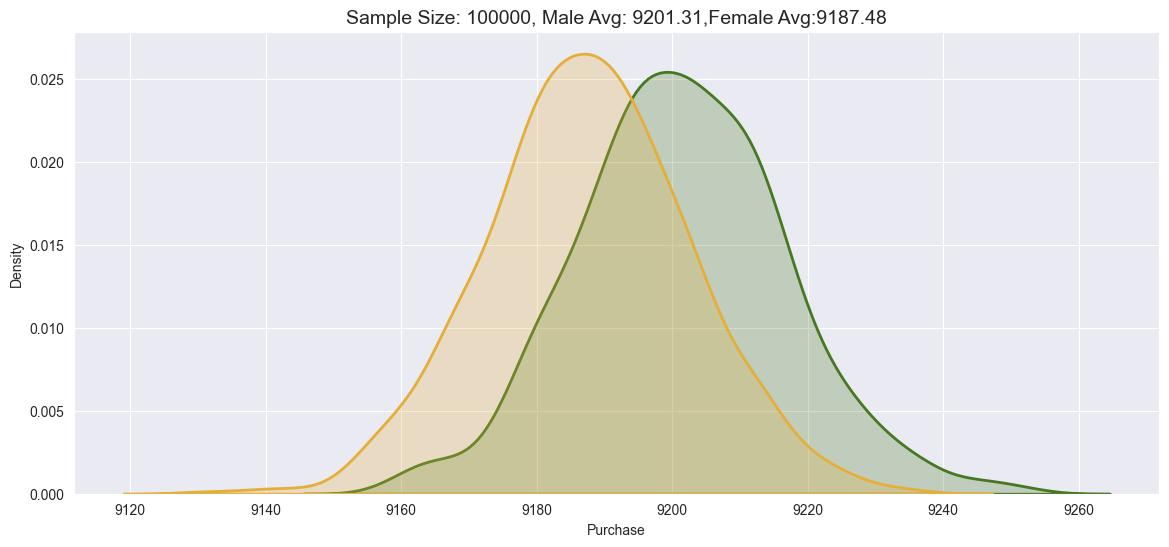

Sample Size : 100000
Confident % : 0.9
CI Unmarried:  [ 9181.57 9220.5 ]
CI Married:  [ 9167.99 9206.22 ]


In [68]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.90

for smp_siz in size_list:
    ur_avg, mr_avg, ll_ur, ul_ur, ll_mr, ul_mr = bootstrapping_mf(df_new_sample_unmarried,df_new_sample_married,smp_siz,itr_size,ci)

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Unmarried: ", "[",ll_ur,ul_ur,"]")
    print( "CI Married: ", "[",ll_mr,ul_mr,"]")
    
    

### CLT Analysis for mean purchase with confidence 95%
### Based on Gender

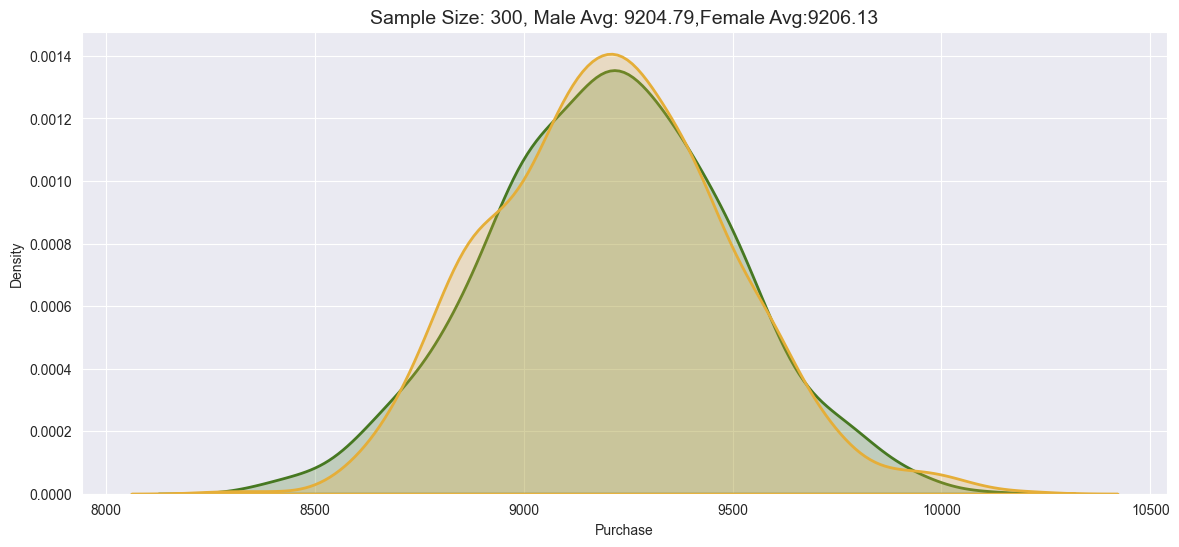

Sample Size : 300
Confident % : 0.95
CI Unmarried:  [ 8722.22 9686.6 ]
CI Married:  [ 8768.1 9659.48 ]


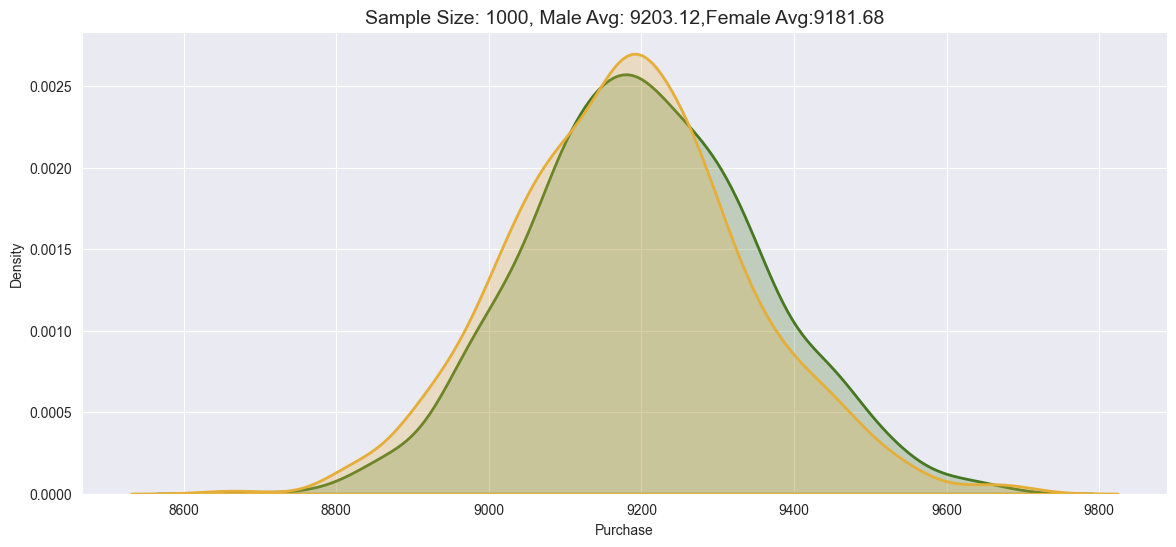

Sample Size : 1000
Confident % : 0.95
CI Unmarried:  [ 8960.46 9462.12 ]
CI Married:  [ 8930.17 9446.8 ]


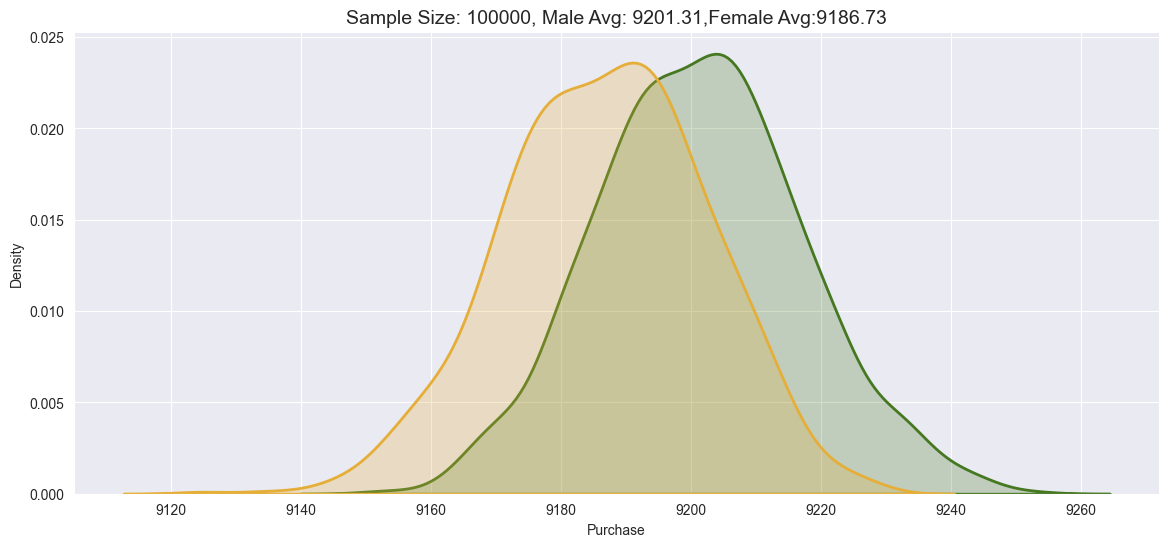

Sample Size : 100000
Confident % : 0.95
CI Unmarried:  [ 9176.21 9229.06 ]
CI Married:  [ 9159.88 9211.55 ]


In [69]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.95

for smp_siz in size_list:
    ur_avg, mr_avg, ll_ur, ul_ur, ll_mr, ul_mr = bootstrapping_mf(df_new_sample_unmarried,df_new_sample_married,smp_siz,itr_size,ci)

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Unmarried: ", "[",ll_ur,ul_ur,"]")
    print( "CI Married: ", "[",ll_mr,ul_mr,"]")
    
    

### CLT Analysis for mean purchase with confidence 99%
### Based on Gender

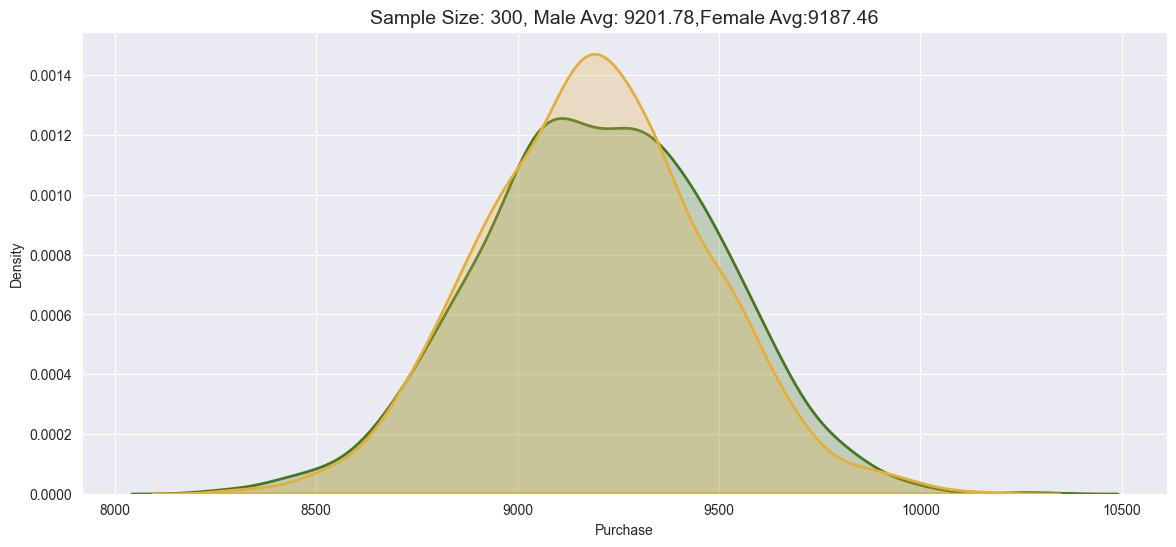

Sample Size : 300
Confident % : 0.99
CI Unmarried:  [ 8514.12 9853.44 ]
CI Married:  [ 8546.71 9866.72 ]


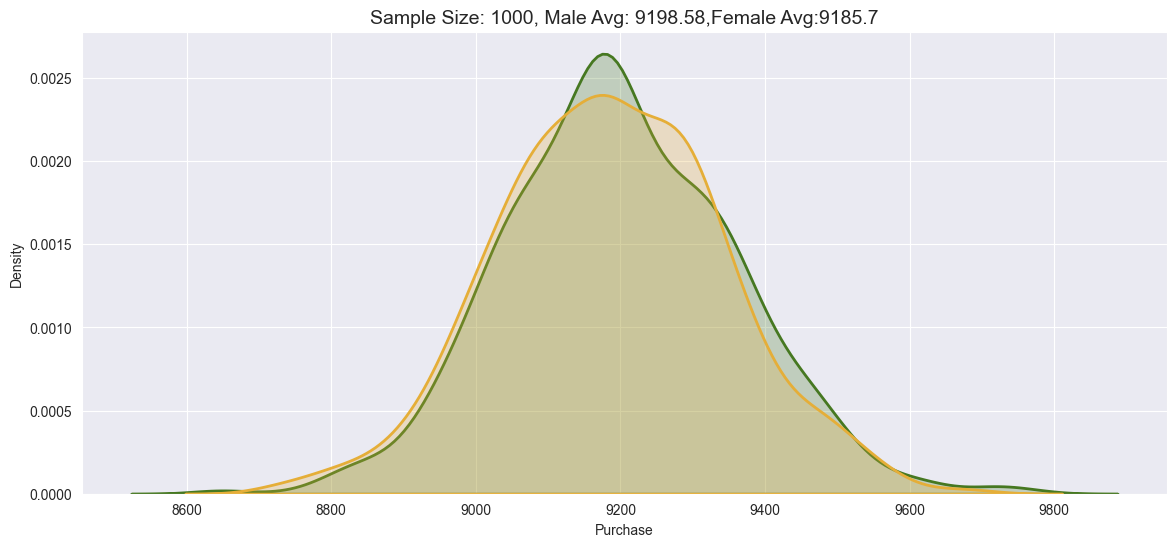

Sample Size : 1000
Confident % : 0.99
CI Unmarried:  [ 8826.71 9594.64 ]
CI Married:  [ 8807.08 9546.0 ]


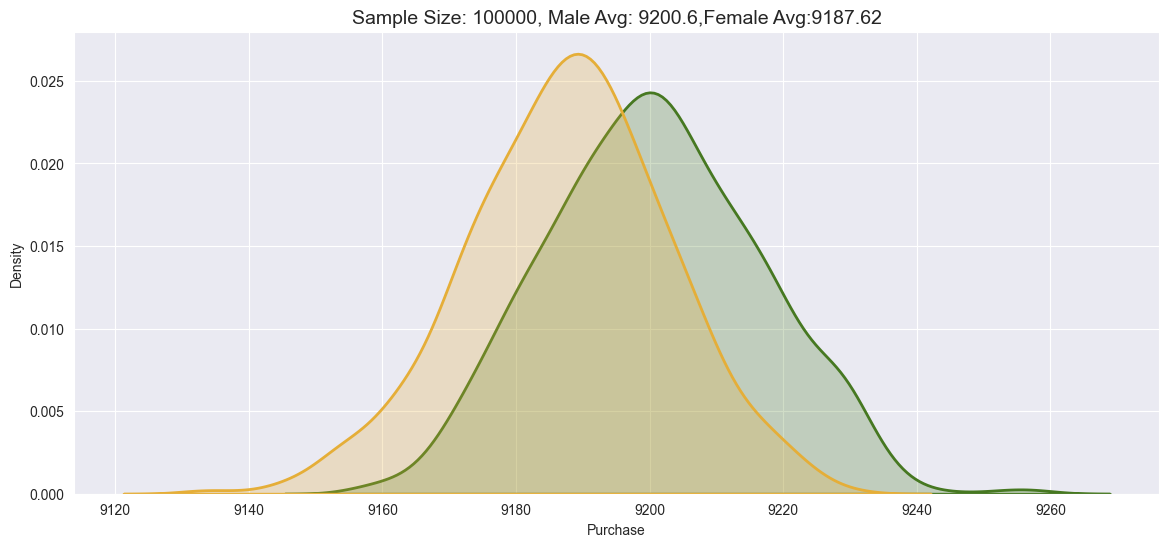

Sample Size : 100000
Confident % : 0.99
CI Unmarried:  [ 9166.63 9234.6 ]
CI Married:  [ 9150.72 9221.02 ]


In [70]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.99

for smp_siz in size_list:
    ur_avg, mr_avg, ll_ur, ul_ur, ll_mr, ul_mr = bootstrapping_mf(df_new_sample_unmarried,df_new_sample_married,smp_siz,itr_size,ci)

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Unmarried: ", "[",ll_ur,ul_ur,"]")
    print( "CI Married: ", "[",ll_mr,ul_mr,"]")
    
    

Insights:

* For both  married and umarried , we can observe Overlapping even when more samples are analyzed and also reducing the CI, which indicates that customers spend the same regardless of whether they are single or married.


### CLT Analysis for mean purchase with confidence 90% - Based on Age group

In [84]:
df_sample_0_17 = df_new[df_new['Age']=='0-17']['Purchase']
df_sample_18_25 = df_new[df_new['Age']=='18-25']['Purchase']
df_sample_26_35 = df_new[df_new['Age']=='26-35']['Purchase']
df_sample_36_45 = df_new[df_new['Age']=='36-45']['Purchase']
df_sample_46_50 = df_new[df_new['Age']=='46-50']['Purchase']
df_sample_51_55 = df_new[df_new['Age']=='51-55']['Purchase']
df_sample_55 = df_new[df_new['Age']=='55+']['Purchase']


In [73]:
print("0-17: ",df_sample_0_17.shape[0])
print("18-25: ",df_sample_18_25.shape[0])
print("26-35: ",df_sample_26_35.shape[0])
print("36-45: ",df_sample_36_45.shape[0])
print("46-50: ",df_sample_46_50.shape[0])
print("51-55: ",df_sample_51_55.shape[0])
print("55+: ",df_sample_55.shape[0])


0-17:  15032
18-25:  99334
26-35:  218661
36-45:  109409
46-50:  45442
51-55:  38191
55+:  21322


In [91]:
def bootstrapping_age(sample_0_17,sample_18_25,sample_26_35,sample_36_45,sample_46_50,sample_51_55,sample_55,smp_siz,itr_size,confidence_level):
    means_0_17=[]
    means_18_25=[]
    means_26_35=[]
    means_36_45=[]
    means_46_50=[]
    means_51_55=[]
    means_55=[]
    for i in range(itr_size):
        
        
        bootstrape_sample_0_17=np.random.choice(sample_0_17,size = smp_siz,replace=True)
        bootstrape_sample_0_17_mean=np.mean(bootstrape_sample_0_17)
    
        bootstrape_sample_18_25=np.random.choice(sample_18_25,size = smp_siz,replace=True)
        bootstrape_sample_18_25_mean=np.mean(bootstrape_sample_18_25)
    
        bootstrape_sample_26_35=np.random.choice(sample_26_35,size = smp_siz,replace=True)
        bootstrape_sample_26_35_mean=np.mean(bootstrape_sample_26_35)
    
        bootstrape_sample_36_45=np.random.choice(sample_36_45,size = smp_siz,replace=True)
        bootstrape_sample_36_45_mean=np.mean(bootstrape_sample_36_45)
        
        bootstrape_sample_46_50=np.random.choice(sample_46_50,size = smp_siz,replace=True)
        bootstrape_sample_46_50_mean=np.mean(bootstrape_sample_46_50)
    
        bootstrape_sample_51_55=np.random.choice(sample_51_55,size = smp_siz,replace=True)
        bootstrape_sample_51_55_mean=np.mean(bootstrape_sample_51_55)
    
        bootstrape_sample_55=np.random.choice(sample_55,size = smp_siz,replace=True)
        bootstrape_sample_55_mean=np.mean(bootstrape_sample_55)
    
        means_0_17.append(bootstrape_sample_0_17_mean)
        means_18_25.append(bootstrape_sample_18_25_mean)
        means_26_35.append(bootstrape_sample_26_35_mean)
        means_36_45.append(bootstrape_sample_36_45_mean)
        means_46_50.append(bootstrape_sample_46_50_mean)
        means_51_55.append(bootstrape_sample_51_55_mean)
        means_55.append(bootstrape_sample_55_mean)

    # Calculate the mean of sampling distribution,CI of a sample mean
    
    sample_mean_0_17= round((np.mean(means_0_17)),2)
    sample_mean_18_25= round((np.mean(means_18_25)),2)
    sample_mean_26_35= round((np.mean(means_26_35)),2)
    sample_mean_36_45= round((np.mean(means_36_45)),2)
    sample_mean_46_50= round((np.mean(means_46_50)),2)
    sample_mean_51_55= round((np.mean(means_51_55)),2)
    sample_mean_55= round((np.mean(means_55)),2)
    
    lower_limit_0_17=round(np.percentile(means_0_17,(100-(100*ci))),2)
    uper_limit_0_17=round(np.percentile(means_0_17,(100*ci)),2)
    
    lower_limit_18_25=round(np.percentile(means_18_25,(100-(100*ci))),2)
    uper_limit_18_25=round(np.percentile(means_18_25,(100*ci)),2)
    
    lower_limit_26_35=round(np.percentile(means_26_35,(100-(100*ci))),2)
    uper_limit_26_35=round(np.percentile(means_26_35,(100*ci)),2)    
    
    lower_limit_36_45=round(np.percentile(means_36_45,(100-(100*ci))),2)
    uper_limit_36_45=round(np.percentile(means_36_45,(100*ci)),2)    
    
    lower_limit_46_50=round(np.percentile(means_46_50,(100-(100*ci))),2)
    uper_limit_46_50=round(np.percentile(means_46_50,(100*ci)),2)    
    
    lower_limit_51_55=round(np.percentile(means_51_55,(100-(100*ci))),2)
    uper_limit_51_55=round(np.percentile(means_51_55,(100*ci)),2)   
    
    lower_limit_55=round(np.percentile(means_55,(100-(100*ci))),2)
    uper_limit_55=round(np.percentile(means_55,(100*ci)),2)
    
    
                           
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=means_0_17,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=means_18_25,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=means_26_35,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=means_36_45,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=means_46_50,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=means_51_55,color='#e5ae38',fill=True,linewidth=2)
    sns.kdeplot(data=means_55,color='#e5ae38',fill=True,linewidth=2)
    
    plt.title(f"Sample Size: {smp_siz}, '0-17yrs': {sample_mean_0_17},'18-25yrs': {sample_mean_18_25},'26-35yrs': {sample_mean_26_35},'36-45yrs': {sample_mean_36_45},'46-50yrs': {sample_mean_46_50},'51-55yrs': {sample_mean_51_55},'55yrs': {sample_mean_55},",fontsize=14)
    plt.xlabel('Purchase')
    
    plt.show()
    
    return means_0_17,means_18_25 ,means_26_35,means_36_45,means_46_50,means_51_55,means_55,lower_limit_0_17,uper_limit_0_17,lower_limit_18_25,uper_limit_18_25,lower_limit_26_35,uper_limit_26_35,lower_limit_36_45,uper_limit_36_45,lower_limit_46_50,uper_limit_46_50,lower_limit_51_55,uper_limit_51_55,lower_limit_55,uper_limit_55

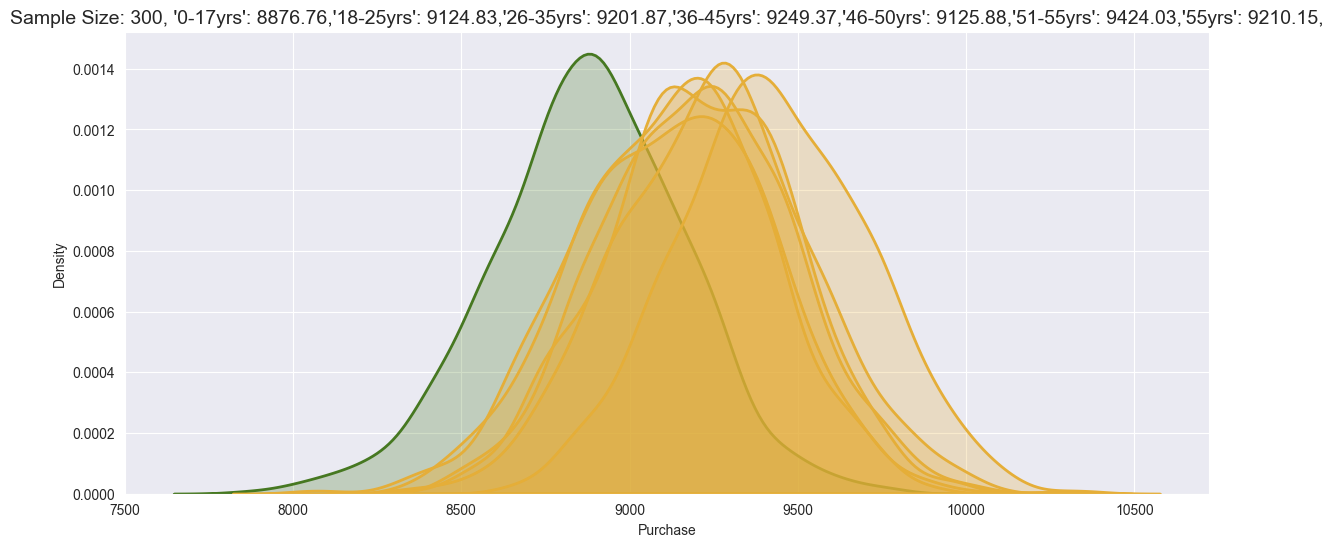

Sample Size : 300
Confident % : 0.99
CI 0-17yrs:  [ 8138.11 9569.7 ]
CI 18-25yrs:  [ 8422.73 9766.48 ]
CI 26-35yrs:  [ 8549.61 9854.68 ]
CI 36-45yrs:  [ 8590.3 9944.61 ]
CI 46-50yrs:  [ 8470.8 9748.56 ]
CI 51-55yrs:  [ 8814.16 10059.02 ]
CI 55+yrs:  [ 8555.76 9815.72 ]


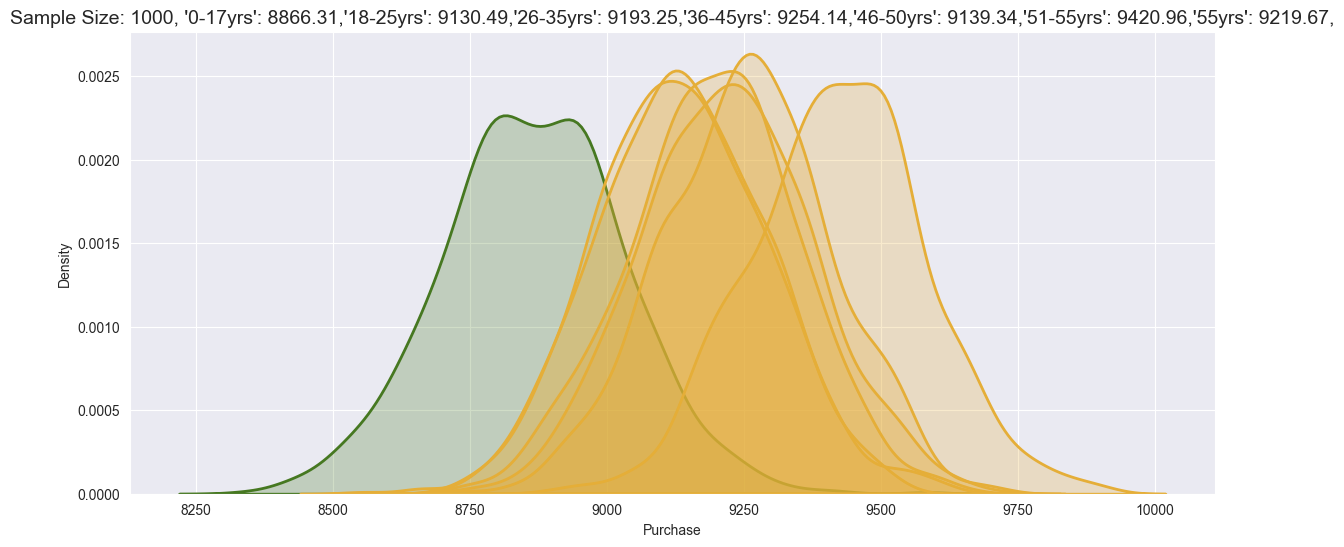

Sample Size : 1000
Confident % : 0.99
CI 0-17yrs:  [ 8480.98 9260.44 ]
CI 18-25yrs:  [ 8779.55 9480.92 ]
CI 26-35yrs:  [ 8841.97 9557.64 ]
CI 36-45yrs:  [ 8905.16 9589.54 ]
CI 46-50yrs:  [ 8794.76 9534.68 ]
CI 51-55yrs:  [ 9048.39 9800.7 ]
CI 55+yrs:  [ 8875.83 9580.9 ]


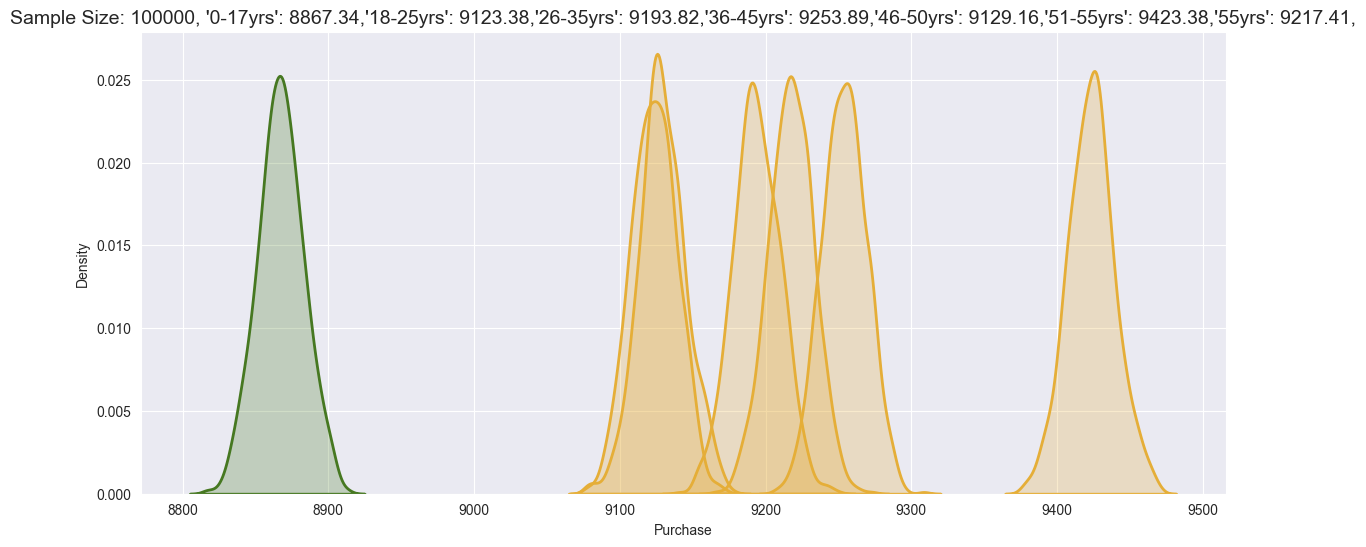

Sample Size : 100000
Confident % : 0.99
CI 0-17yrs:  [ 8832.94 8903.07 ]
CI 18-25yrs:  [ 9089.25 9157.09 ]
CI 26-35yrs:  [ 9155.51 9230.23 ]
CI 36-45yrs:  [ 9218.93 9287.17 ]
CI 46-50yrs:  [ 9091.6 9166.83 ]
CI 51-55yrs:  [ 9387.06 9462.33 ]
CI 55+yrs:  [ 9181.11 9252.53 ]


In [94]:
itr_size = 1000
size_list = [300, 1000,100000]
ci = 0.99

for smp_siz in size_list:
    avg_0_17, avg_18_25,avg_26_35,avg_36_45,avg_46_50,avg_51_55,avg_55, ll_0_17, ul_0_17,ll_18_25, ul_18_25,ll_26_35, ul_26_35,ll_36_45, ul_36_45,ll_46_50, ul_46_50,ll_51_55, ul_51_55,ll_55, ul_55 = bootstrapping_age(df_sample_0_17,df_sample_18_25,df_sample_26_35,df_sample_36_45,df_sample_46_50,df_sample_51_55,df_sample_55,smp_siz,itr_size,ci)

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI 0-17yrs: ", "[",ll_0_17,ul_0_17,"]")
    print( "CI 18-25yrs: ", "[",ll_18_25,ul_18_25,"]")
    print( "CI 26-35yrs: ", "[",ll_26_35,ul_26_35,"]")
    print( "CI 36-45yrs: ", "[",ll_36_45,ul_36_45,"]")
    print( "CI 46-50yrs: ", "[",ll_46_50,ul_46_50,"]")
    print( "CI 51-55yrs: ", "[",ll_51_55,ul_51_55,"]")
    print( "CI 55+yrs: ", "[",ll_55,ul_55,"]")
    
    

Inferences
* Spending by Age_group 0-17 is low (8832.94,8903.07)compared to other age groups.
* Customers in Age_group 51-55 spend the most between 9387.06 and 9462.33

Recommendations
* Company should come-up with some campaign to to attract more younger generation..
* Company should have some offers on kids (0-17 years) in order to increase sales.


## 4.Answering questions 

####  1.Are women spending more money per transaction than men? Why or Why not?

* We can infer that on average women spent less than men per transaction.
* This can be infered as we have seen, that Males clearly purchase more than females. 75% of men and only 25% of women purchase products.


#### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers 
* For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8637.09, 8706.4]
* For Male range for mean purchase with confidence interval 99% is [9332.29, 9402.76]
* Distribution is below:

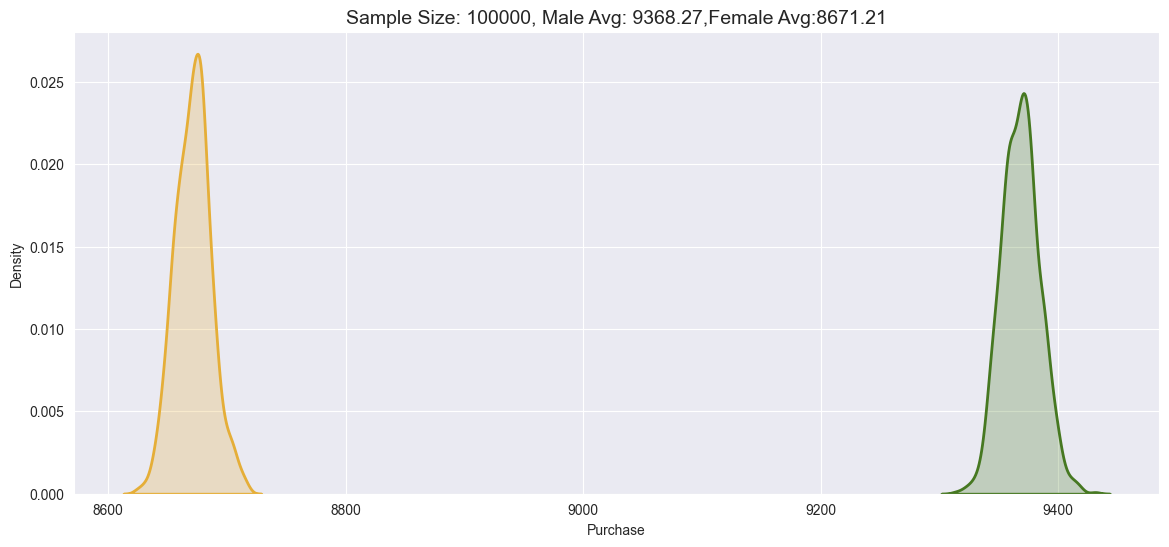

Sample Size : 100000
Confident % : 0.99
CI Male:  [ 9332.9 9408.33 ]
CI Female:  [ 8637.29 8709.33 ]


In [96]:
itr_size = 1000
size_list = [100000]
ci = 0.99

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping_mf(df_new_sample_male,df_new_sample_female,smp_siz,itr_size,ci)
    #Alpha= 0.5

    print("Sample Size :", smp_siz)
    print('Confident % :', ci)
    print( "CI Male: ", "[",ll_m,ul_m,"]")
    print( "CI Female: ", "[",ll_f,ul_f,"]")

#### 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

* Confidence interval overlapes when we take less sample size. As the sample size increases, the two groups start to become distinct
* Since females spend less than males on average, wallmart needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending.

#### 4.Results when the same activity is performed for Married vs Unmarried

* For both  married and umarried , we can observe Overlapping even when more samples are analyzed and also reducing the CI, which indicates that customers spend the same regardless of whether they are single or married.

#### 5. Results when the same activity is performed for Age
* Spending by Age_group 0-17 is low (8832.94,8903.07)compared to other age groups.
* Customers in Age_group 51-55 spend the most between 9387.06 and 9462.33
* Company should come-up with some campaign to to attract more younger generation..
* Company should have some offers on kids (0-17 years) in order to increase sales.




### 5. Final Insights

#### Illustrate the insights based on exploration 

* There are 550068 transaction details and and 10 attributes for each transaction.
* We can see that there is no duplicates rows in the dataset
* We can see that there is no null values in the dataset
* The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products
* The percentage of Female customers is 28% compared to 72% are Male
* Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
* Age group is categorised into 7 groups with max age group members are of 26-35 yrs and min age group is 0-17 yrs.
* 60% of purchases are made by people between the ages of 26 and 45
* Cities are categorised into three Types: A,B and C.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* The majority of our customers come from city category B.
* There are 20 different types of Occupation and Product_Category
* Product_Category - 5, 1, 8, & 11 have highest purchasing frequency.
* 60% of purchases are made by people between the ages of 26 and 45
* City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.
* Married and Single are categorised as 1 and 0 respectively, with 41%(225337) married customers compared to 59%(327431) unmarried customers.
* 35% Staying in the city from 1 year, 19% from 2 years, 17% from 3 years
* The majority of our customers come from city category B but customers come from City category C spent more.
* Male customers tend to spend more than female customers.
* Purchase is same for all age groups
* Purchase is irrespective of marital status.
* Mostly features are categorical and not much correlation can be observed


#### Illustrate the insights based on CLT 

* Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
* For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8637.09, 8706.4]

* For Male range for mean purchase with confidence interval 99% is [9332.29, 9402.76]
* Increase in  confidence percentage increase the difference between the upper and lower limits. For male Confidence percent as [90,95,99] have difference between the upper & lower limits as [43.28,51.61,70.47]. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [38.5,47.44,69.31]
* For both  married and umarried , we can observe Overlapping even when more samples are analyzed and also reducing the CI, which indicates that customers spend the same regardless of whether they are single or married.
* Spending by Age_group 0-17 is low (8832.94,8903.07)compared to other age groups.
* Customers in Age_group 51-55 spend the most between 9387.06 and 9462.33

### Recommendations 

* Females spend less than males on average, Adding some additional offers for women can increase their spending on Black Friday.
* Specaially cosmetics/new born baby products wallmart can provide specific offers or some % discount.
* Wallmart should have some offers on kids (0-17 years) in order to increase sales. 
* For kids (0-17 years) wallmart can organise some kind of games/competition to attract these age groups. This might attarct the parents as well along with kids.


In [2]:
100-(100*.95)

5.0